In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('online_retail.csv')
print(df.head())
print(df.shape)


   index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
(541909, 9)


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB
None


In [4]:
df.nunique()

index          541909
InvoiceNo       25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64

In [5]:
print(df.columns)

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [6]:
print(df.describe())

              index       Quantity      UnitPrice     CustomerID
count  541909.00000  541909.000000  541909.000000  406829.000000
mean   270954.00000       9.552250       4.611114   15287.690570
std    156435.79785     218.081158      96.759853    1713.600303
min         0.00000  -80995.000000  -11062.060000   12346.000000
25%    135477.00000       1.000000       1.250000   13953.000000
50%    270954.00000       3.000000       2.080000   15152.000000
75%    406431.00000      10.000000       4.130000   16791.000000
max    541908.00000   80995.000000   38970.000000   18287.000000


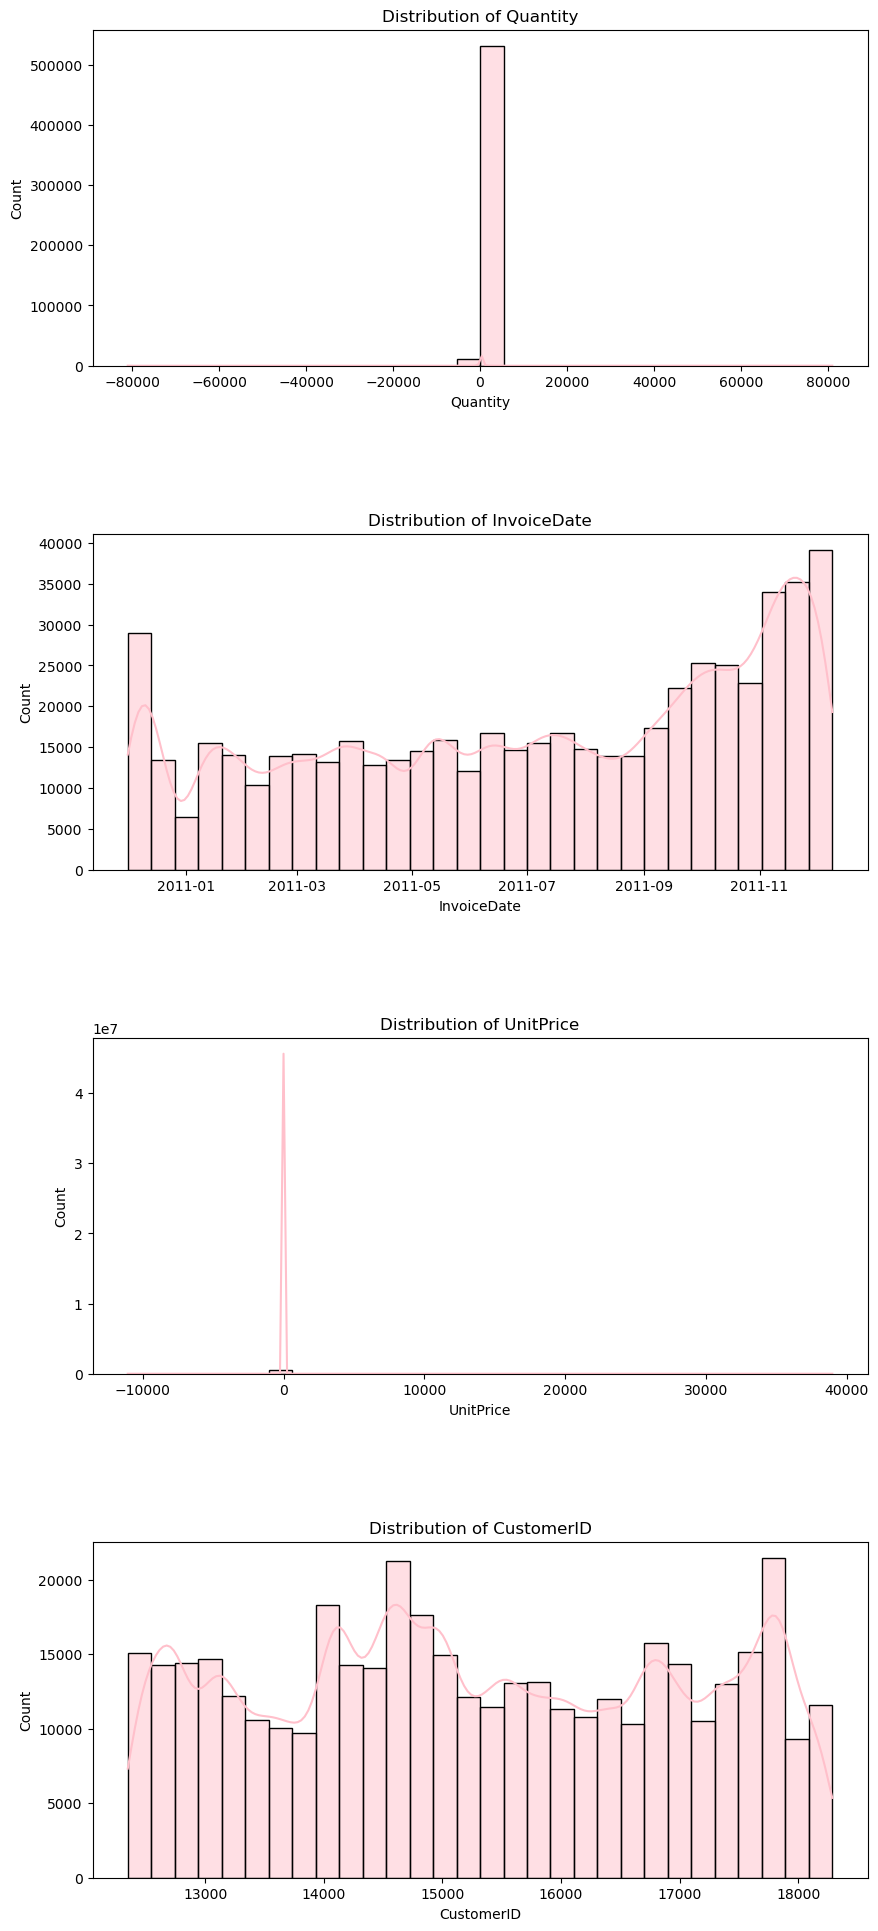

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
selected_columns = [ 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']

# Create subplots
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(10, 6 * len(selected_columns)))
fig.subplots_adjust(hspace=0.5)

# Plot histograms for each column
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], ax=axes[i], kde=True, bins=30, color='pink')
    axes[i].set_title(f'Distribution of {column}')

plt.show()


In [61]:
# Assuming df is your DataFrame
selected_columns = ['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

# Print the range for each column
for column in selected_columns:
    column_range = df[column].min(), df[column].max()
    print(f'{column} Range: {column_range}')
print(df['UnitPrice'].min(),df['UnitPrice'].max())

InvoiceNo Range: ('536365', 'C581569')
StockCode Range: ('10002', 'm')
Quantity Range: (-80995, 80995)
InvoiceDate Range: (Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))
UnitPrice Range: (-11062.06, 38970.0)
CustomerID Range: (12346.0, 18287.0)
Country Range: ('Australia', 'Unspecified')
-11062.06 38970.0


In [7]:
#CHeck for missing values
print(df.isnull().sum())

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
import pandas as pd

# Assuming df is your DataFrame and 'InvoiceDate' is the column containing date and time
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extracting date and time into separate columns using string manipulation
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time

# Displaying the DataFrame with new columns
print(df[['InvoiceDate', 'Date', 'Time']])


               InvoiceDate        Date      Time
0      2010-12-01 08:26:00  2010-12-01  08:26:00
1      2010-12-01 08:26:00  2010-12-01  08:26:00
2      2010-12-01 08:26:00  2010-12-01  08:26:00
3      2010-12-01 08:26:00  2010-12-01  08:26:00
4      2010-12-01 08:26:00  2010-12-01  08:26:00
...                    ...         ...       ...
541904 2011-12-09 12:50:00  2011-12-09  12:50:00
541905 2011-12-09 12:50:00  2011-12-09  12:50:00
541906 2011-12-09 12:50:00  2011-12-09  12:50:00
541907 2011-12-09 12:50:00  2011-12-09  12:50:00
541908 2011-12-09 12:50:00  2011-12-09  12:50:00

[541909 rows x 3 columns]


In [9]:
print(df.head())
print(df.columns)

   index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country        Date  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010-12-01   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010-12-01   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010-12-01   

       Time  
0  08:26:00  
1  08:26:00  
2  08:26:00  
3  08:26:00 

In [10]:
year_range = df['InvoiceDate'].dt.year.unique()
print(year_range)

[2010 2011]


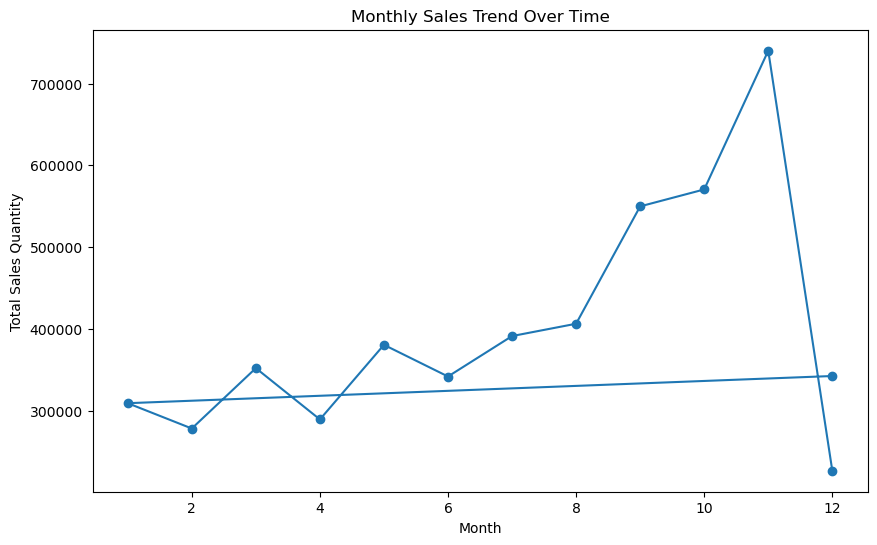

In [11]:
#Sales analysis
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'InvoiceDate' is the column containing dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extracting Year and Month
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Grouping by Year and Month and calculating total sales
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trend Over Time')
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Grouping by Year and Month and calculating total sales
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Sorting months based on total sales in descending order
top_months = monthly_sales.sort_values(by='Quantity', ascending=False).head(5)

# Printing the top 5 highest sales months
print("Top 5 Highest Sales Months:")
print(top_months[['Year', 'Month', 'Quantity']])


Top 5 Highest Sales Months:
    Year  Month  Quantity
11  2011     11    740286
10  2011     10    570532
9   2011      9    549817
8   2011      8    406199
7   2011      7    391116


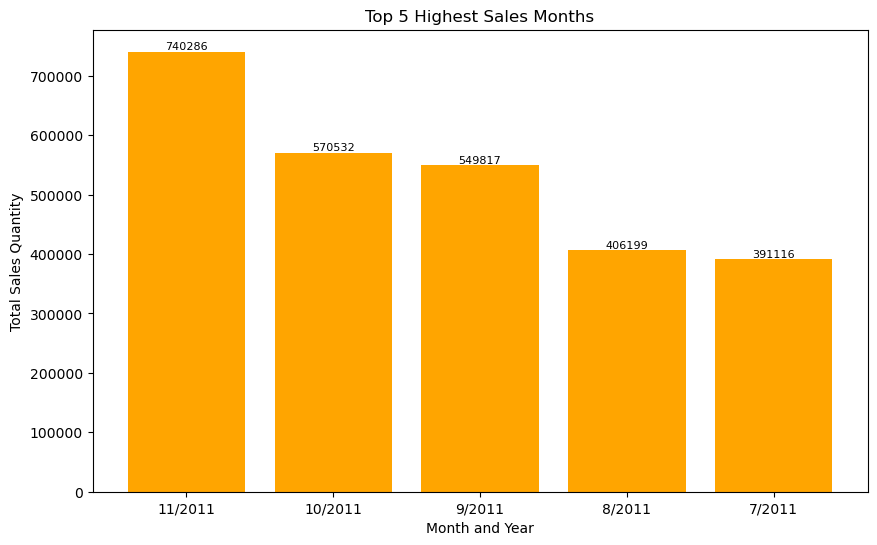

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Grouping by Year and Month and calculating total sales
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Sorting months based on total sales in descending order
top_months = monthly_sales.sort_values(by='Quantity', ascending=False).head(5)

# Creating a bar chart with values on top
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(range(len(top_months)), top_months['Quantity'], color='orange')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales Quantity')
plt.title('Top 5 Highest Sales Months')

# Adding values on top of the bars
for index, value in enumerate(top_months['Quantity']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

# Adding x-axis labels
plt.xticks(range(len(top_months)), [f"{month}/{year}" for year, month in zip(top_months['Year'], top_months['Month'])])

plt.show()


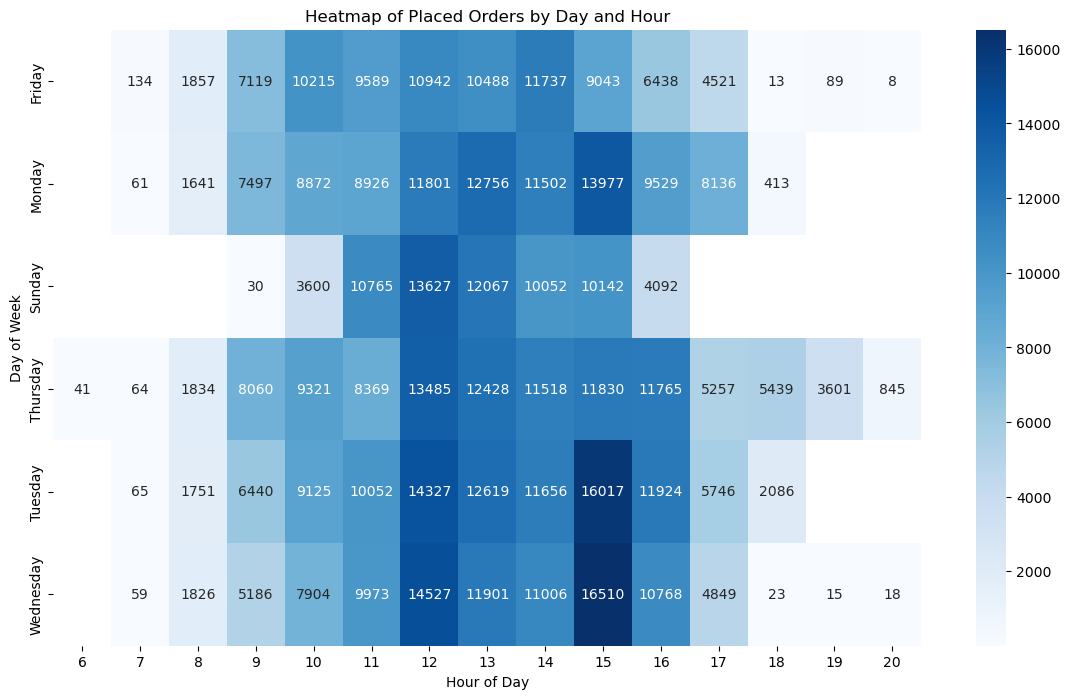

Top 3 Days with Highest Placed Orders:
DayOfWeek
Thursday    103857
Tuesday     101808
Monday       95111
Name: count, dtype: int64

Top 5 Hours with Highest Placed Orders:
HourOfDay
12    78709
15    77519
13    72259
14    67471
11    57674
Name: count, dtype: int64


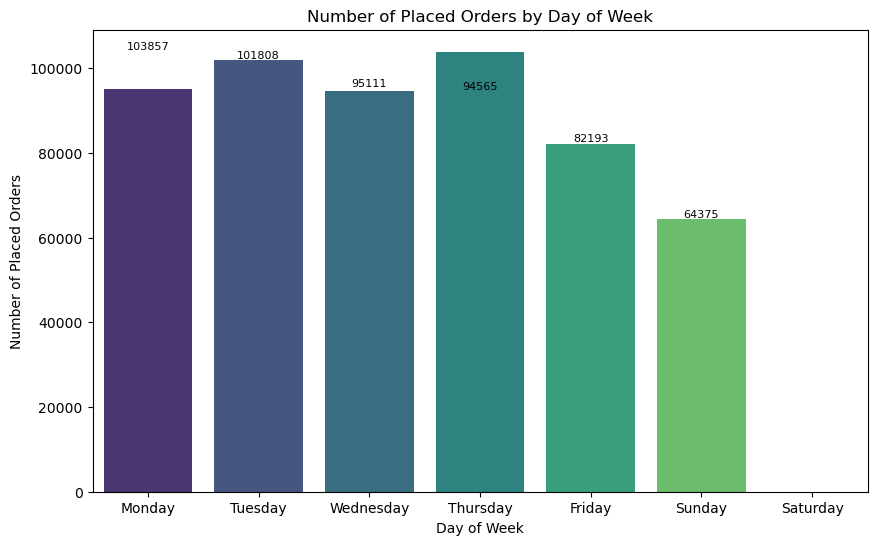

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'InvoiceNo' is the column containing invoice numbers
placed_orders = df[~df['InvoiceNo'].str.startswith('c')]

# Extracting day of week and hour of day
placed_orders['DayOfWeek'] = placed_orders['InvoiceDate'].dt.day_name()
placed_orders['HourOfDay'] = placed_orders['InvoiceDate'].dt.hour

# Create a pivot table for placed orders by day and hour
order_heatmap = placed_orders.groupby(['DayOfWeek', 'HourOfDay'])['InvoiceNo'].count().unstack()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(order_heatmap, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Heatmap of Placed Orders by Day and Hour')
plt.show()

# Top 3 Days with Highest Placed Orders
top_days = placed_orders['DayOfWeek'].value_counts().head(3)
print("Top 3 Days with Highest Placed Orders:")
print(top_days)

# Top 5 Hours with Highest Placed Orders
top_hours = placed_orders['HourOfDay'].value_counts().head(5)
print("\nTop 5 Hours with Highest Placed Orders:")
print(top_hours)

# Bar chart for placed orders by day with a colorful palette and numbers on top of bars
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='DayOfWeek', data=placed_orders, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday'], palette='viridis')
plt.xlabel('Day of Week')
plt.ylabel('Number of Placed Orders')
plt.title('Number of Placed Orders by Day of Week')

# Adding numbers on top of bars
for index, value in enumerate(placed_orders['DayOfWeek'].value_counts()):
    bar_plot.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

plt.show()


In [13]:
# Subset data for Saturday orders
saturday_orders = placed_orders[placed_orders['DayOfWeek'] == 'Saturday']

# Calculate the number of orders on Saturday
number_of_orders_on_saturday = len(saturday_orders)

# Display the result
print(f'Number of Orders Placed on Saturday: {number_of_orders_on_saturday}')


Number of Orders Placed on Saturday: 0


In [14]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming df is your DataFrame with 'InvoiceNo' and 'Description' columns
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Convert quantities to boolean values (True if item was bought, False otherwise)
basket_sets = basket.applymap(lambda x: True if x > 0 else False)

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Extract association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Display association rules
print(rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [15]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming basket_sets is your DataFrame with binary item representation (0 or 1)
# Each row is a transaction, and columns are items

# Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Association rules with minimum confidence set to 0.5 (adjust as needed)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Display the rules
print("Association Rules:")
print(rules)


Association Rules:
                                           antecedents  \
0                        (60 TEATIME FAIRY CAKE CASES)   
1                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
2                     (ALARM CLOCK BAKELIKE CHOCOLATE)   
3                         (ALARM CLOCK BAKELIKE IVORY)   
4                        (ALARM CLOCK BAKELIKE ORANGE)   
..                                                 ...   
412  (JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...   
413  (JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS...   
414  (JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)   
415  (JUMBO STORAGE BAG SUKI, JUMBO SHOPPER VINTAGE...   
416  (JUMBO BAG PINK POLKADOT, JUMBO SHOPPER VINTAG...   

                                           consequents  antecedent support  \
0                    (PACK OF 72 RETROSPOT CAKE CASES)            0.033871   
1                         (ALARM CLOCK BAKELIKE GREEN)            0.017508   
2                          (ALARM CLOCK BAKELIKE R

In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Assuming you have a dataset with transactions
# transactions = [...]

# Convert the transactions to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the results
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


NameError: name 'transactions' is not defined

In [16]:
#import pandas as pd
#from mlxtend.frequent_patterns import apriori, association_rules

# Assuming df is your DataFrame and 'Description' is the column containing product descriptions
# You may need to adjust these column names based on your actual DataFrame
#basket = (df[df['InvoiceNo'].str.startswith('5')].groupby(['InvoiceNo', 'Description'])
          #.size().unstack().reset_index().fillna(0)
          #.set_index('InvoiceNo'))

# Convert the counts to binary values (0 or 1)
#basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
#frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate association rules
#rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
#print(rules)


Mean Absolute Error: 12.265750921341441
Mean Squared Error: 1722.9738393130467
Root Mean Squared Error: 41.508720039445286


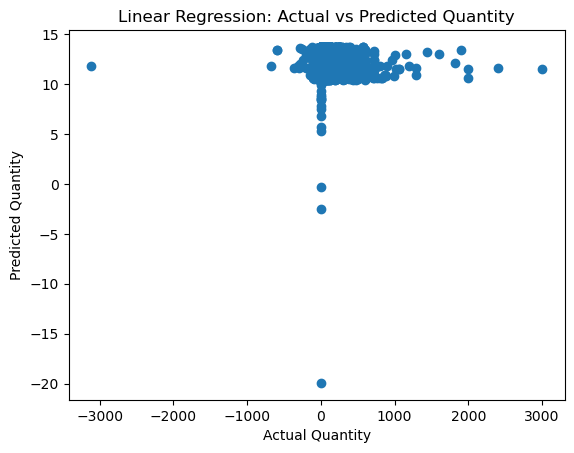

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting relevant columns for linear regression
df_sales = df[['Quantity', 'UnitPrice', 'CustomerID']]

# Dropping rows with missing values
df_sales = df_sales.dropna()

# Defining the features (X) and target variable (y)
X = df_sales[['UnitPrice', 'CustomerID']]
y = df_sales['Quantity']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Visualizing the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Linear Regression: Actual vs Predicted Quantity')
plt.show()


Accuracy: 0.98
Confusion Matrix:
[[    3  1707]
 [    4 79652]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.00      0.00      1710
           1       0.98      1.00      0.99     79656

    accuracy                           0.98     81366
   macro avg       0.70      0.50      0.50     81366
weighted avg       0.97      0.98      0.97     81366



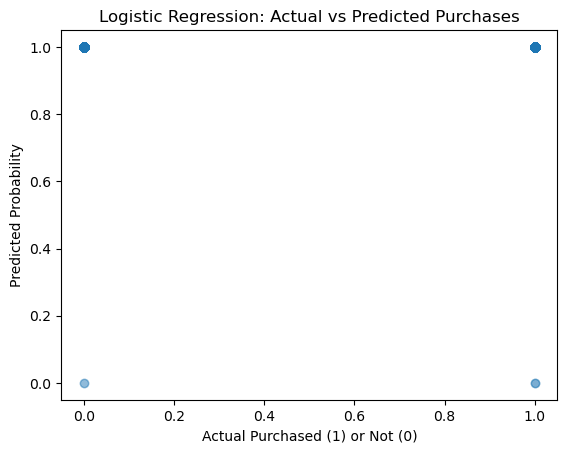

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Selecting relevant columns for logistic regression
df_sales = df[['Quantity', 'UnitPrice', 'CustomerID']]

# Dropping rows with missing values
df_sales = df_sales.dropna()

# Converting 'Quantity' to binary (1 if purchased, 0 if not)
df_sales['Purchased'] = (df_sales['Quantity'] > 0).astype(int)

# Defining the features (X) and target variable (y)
X = df_sales[['UnitPrice', 'CustomerID']]
y = df_sales['Purchased']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (optional but often beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating a logistic regression model
model = LogisticRegression(random_state=42)

# Training the model
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Visualizing the results (optional for binary classification)
plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel('Actual Purchased (1) or Not (0)')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression: Actual vs Predicted Purchases')
plt.show()


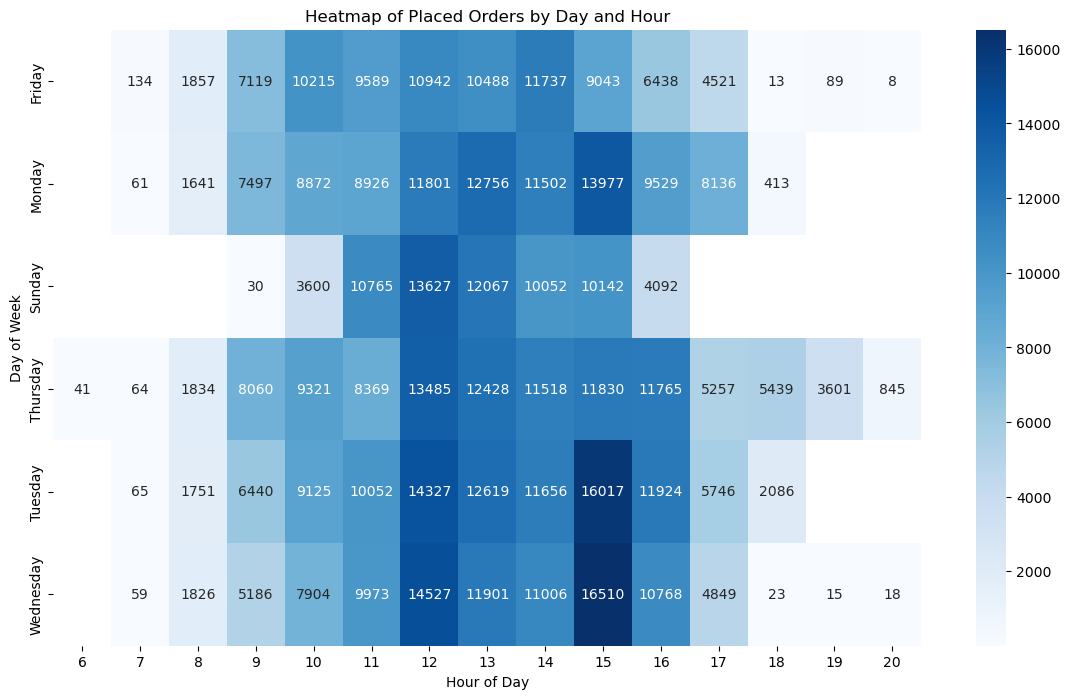

Top 3 Days with Highest Placed Orders:
DayOfWeek
Thursday    103857
Tuesday     101808
Monday       95111
Name: count, dtype: int64

Top 5 Hours with Highest Placed Orders:
HourOfDay
12    78709
15    77519
13    72259
14    67471
11    57674
Name: count, dtype: int64


In [17]:
import seaborn as sns

# Assuming df is your DataFrame and 'InvoiceNo' is the column containing invoice numbers
placed_orders = df[~df['InvoiceNo'].str.startswith('c')]

# Extracting day of week and hour of day
placed_orders['DayOfWeek'] = placed_orders['InvoiceDate'].dt.day_name()
placed_orders['HourOfDay'] = placed_orders['InvoiceDate'].dt.hour

# Create a pivot table for placed orders by day and hour
order_heatmap = placed_orders.groupby(['DayOfWeek', 'HourOfDay'])['InvoiceNo'].count().unstack()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(order_heatmap, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Heatmap of Placed Orders by Day and Hour')
plt.show()

# Top 3 Days with Highest Placed Orders
top_days = placed_orders['DayOfWeek'].value_counts().head(3)
print("Top 3 Days with Highest Placed Orders:")
print(top_days)

# Top 5 Hours with Highest Placed Orders
top_hours = placed_orders['HourOfDay'].value_counts().head(5)
print("\nTop 5 Hours with Highest Placed Orders:")
print(top_hours)


In [18]:
# Cancellation impact
# Assuming df is your DataFrame and 'InvoiceNo' is the column containing invoice numbers
canceled_transactions = df[df['InvoiceNo'].str.startswith('C')]
print(canceled_transactions.count())

# Calculate the percentage of canceled transactions
cancellation_percentage = (len(canceled_transactions) / len(df)) * 100

print(f'Percentage of Canceled Transactions: {cancellation_percentage:.2f}%')


index          9288
InvoiceNo      9288
StockCode      9288
Description    9288
Quantity       9288
InvoiceDate    9288
UnitPrice      9288
CustomerID     8905
Country        9288
Date           9288
Time           9288
Year           9288
Month          9288
dtype: int64
Percentage of Canceled Transactions: 1.71%


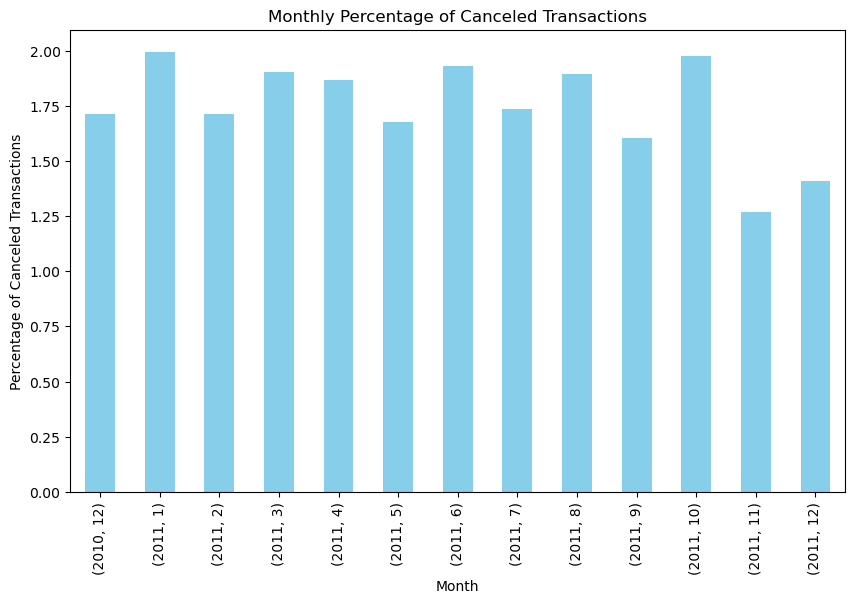

In [19]:
#Temporal os cancellation
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'InvoiceDate' is the column containing dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Creating a bar plot to show the percentage of canceled transactions per month
monthly_cancellation_percentage = canceled_transactions.groupby(['Year', 'Month']).size() / df.groupby(['Year', 'Month']).size() * 100
monthly_cancellation_percentage.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Month')
plt.ylabel('Percentage of Canceled Transactions')
plt.title('Monthly Percentage of Canceled Transactions')
plt.show()


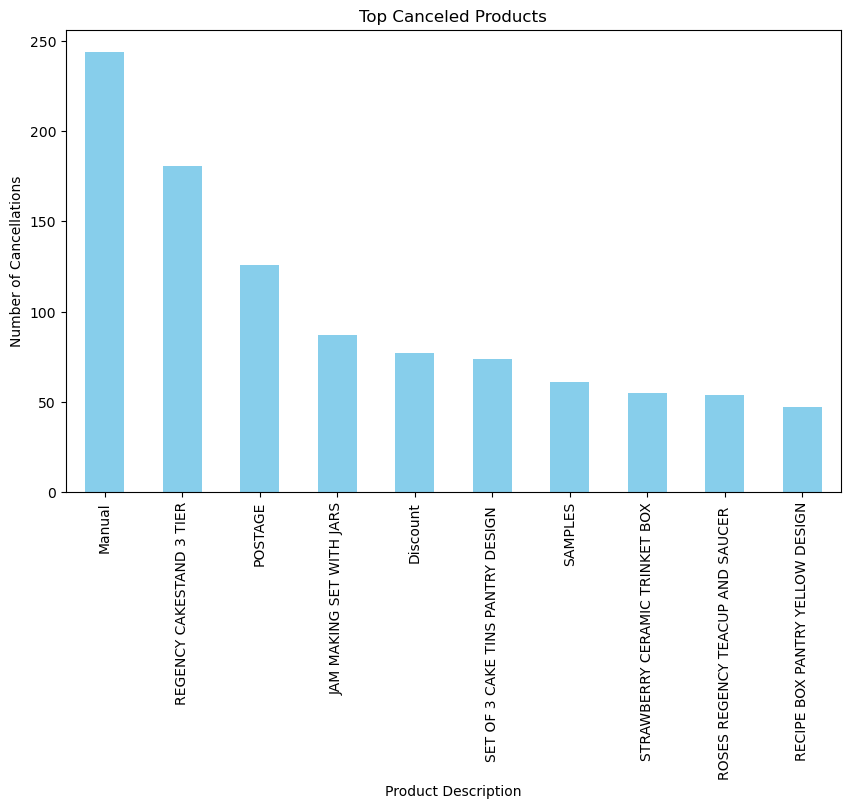

In [20]:
#Product Analysis:

# Assuming df is your DataFrame and 'Description' is the column containing product descriptions
canceled_products = canceled_transactions['Description'].value_counts().head(10)

# Plotting the bar graph for top canceled products
plt.figure(figsize=(10, 6))
canceled_products.plot(kind='bar', color='skyblue')
plt.xlabel('Product Description')
plt.ylabel('Number of Cancellations')
plt.title('Top Canceled Products')
plt.show()


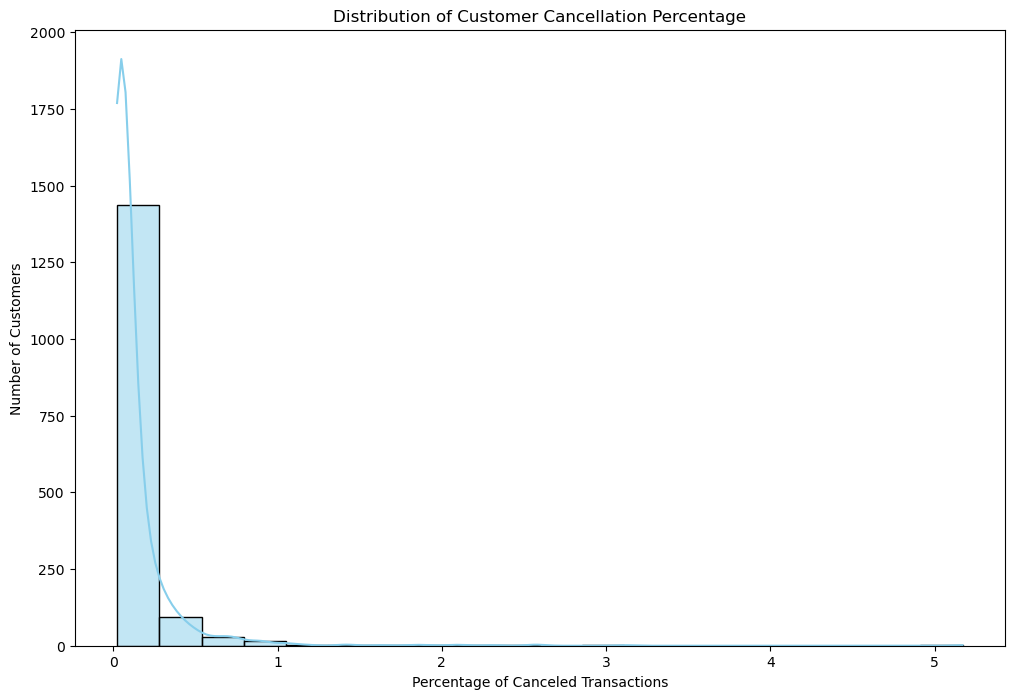

In [21]:
#customer analysis
# Assuming df is your DataFrame and 'CustomerID' is the column containing customer IDs
canceled_customer_percentage = canceled_transactions['CustomerID'].value_counts() / df['CustomerID'].nunique() * 100

# Plotting a histogram of the cancellation percentage for each customer
plt.figure(figsize=(12, 8))
sns.histplot(canceled_customer_percentage, bins=20, kde=True, color='skyblue')
plt.xlabel('Percentage of Canceled Transactions')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Cancellation Percentage')
plt.show()



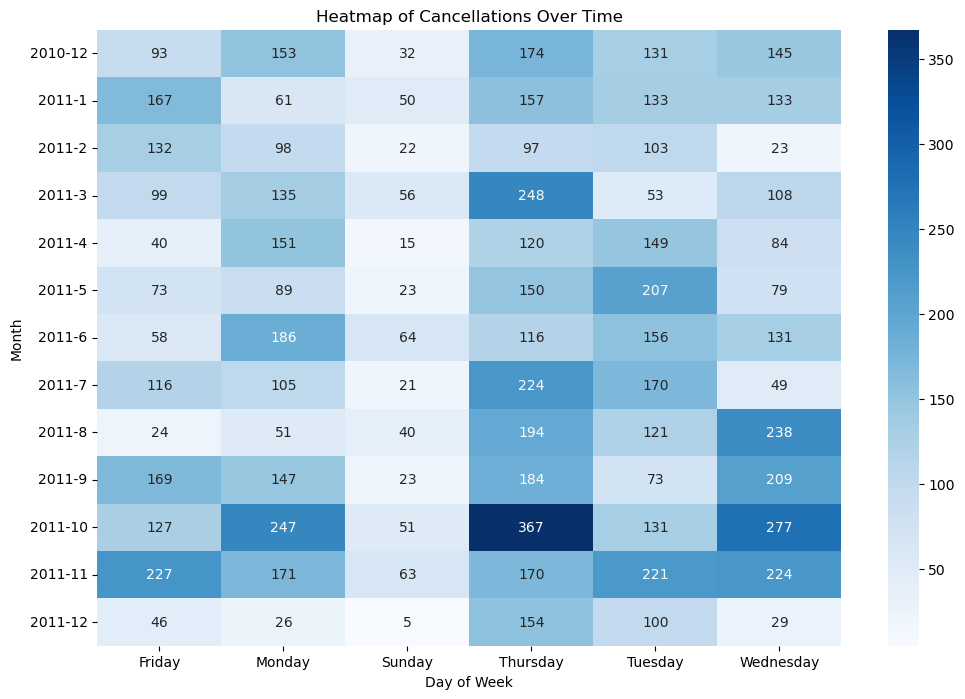

In [22]:
# Creating a pivot table for cancellations over time
cancellation_heatmap = canceled_transactions.groupby(['Year', 'Month', canceled_transactions['InvoiceDate'].dt.day_name()])['InvoiceNo'].count().unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cancellation_heatmap, cmap='Blues', annot=True, fmt='g')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.title('Heatmap of Cancellations Over Time')
plt.show()


/var/folders/j4/8t1hkd6s73b83jybzsvpw5dc0000gn/T/ipykernel_71398/3763794259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_transactions['DayOfWeek'] = canceled_transactions['InvoiceDate'].dt.day_name()
/var/folders/j4/8t1hkd6s73b83jybzsvpw5dc0000gn/T/ipykernel_71398/3763794259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_transactions['HourOfDay'] = canceled_transactions['InvoiceDate'].dt.hour


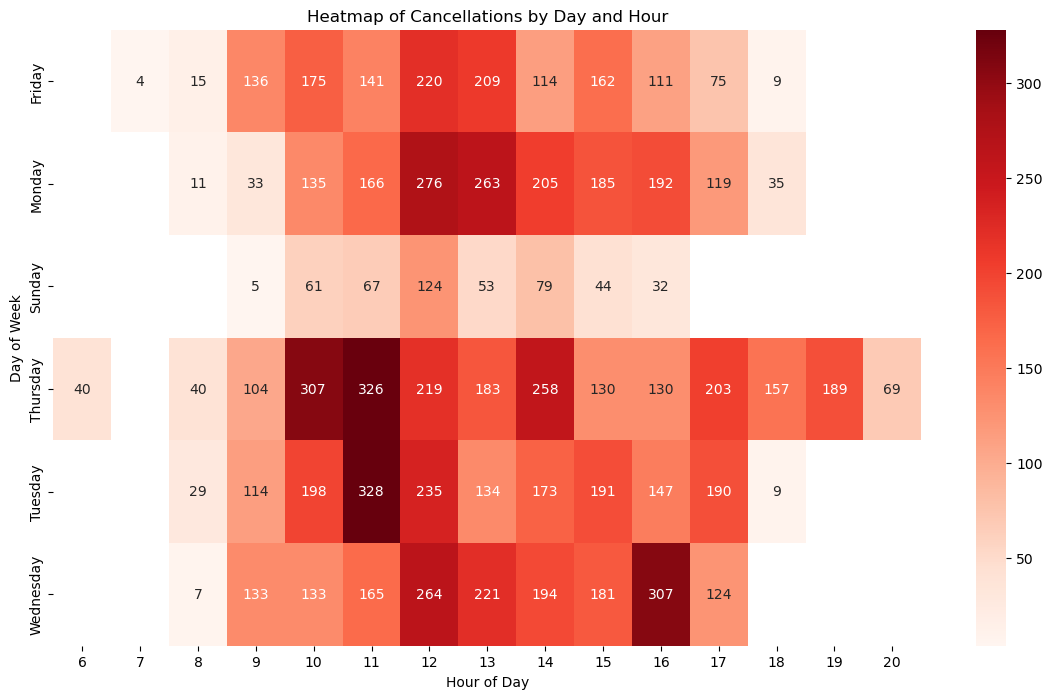

In [23]:
import seaborn as sns

# Assuming df is your DataFrame
canceled_transactions['DayOfWeek'] = canceled_transactions['InvoiceDate'].dt.day_name()
canceled_transactions['HourOfDay'] = canceled_transactions['InvoiceDate'].dt.hour

# Create a pivot table for cancellations by day and hour
cancellation_heatmap = canceled_transactions.groupby(['DayOfWeek', 'HourOfDay'])['InvoiceNo'].count().unstack()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cancellation_heatmap, cmap='Reds', annot=True, fmt='g')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Heatmap of Cancellations by Day and Hour')
plt.show()


In [24]:
import seaborn as sns

# Assuming df is your DataFrame
canceled_transactions['DayOfWeek'] = canceled_transactions['InvoiceDate'].dt.day_name()
canceled_transactions['HourOfDay'] = canceled_transactions['InvoiceDate'].dt.hour

# Create a pivot table for cancellations by day and hour
cancellation_heatmap = canceled_transactions.groupby(['DayOfWeek', 'HourOfDay'])['InvoiceNo'].count().unstack()

# Finding the top hours with the highest cancellations
top_hours = cancellation_heatmap.sum(axis=0).nlargest(5)

# Finding the top days with the highest cancellations
top_days = cancellation_heatmap.sum(axis=1).nlargest(3)

print("Top 5 Hours with Highest Cancellations:")
print(top_hours)

print("\nTop 3 Days with Highest Cancellations:")
print(top_days)


Top 5 Hours with Highest Cancellations:
HourOfDay
12    1338.0
11    1193.0
13    1063.0
14    1023.0
10    1009.0
dtype: float64

Top 3 Days with Highest Cancellations:
DayOfWeek
Thursday     2355.0
Tuesday      1748.0
Wednesday    1729.0
dtype: float64


/var/folders/j4/8t1hkd6s73b83jybzsvpw5dc0000gn/T/ipykernel_71398/2726177871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_transactions['DayOfWeek'] = canceled_transactions['InvoiceDate'].dt.day_name()
/var/folders/j4/8t1hkd6s73b83jybzsvpw5dc0000gn/T/ipykernel_71398/2726177871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_transactions['HourOfDay'] = canceled_transactions['InvoiceDate'].dt.hour


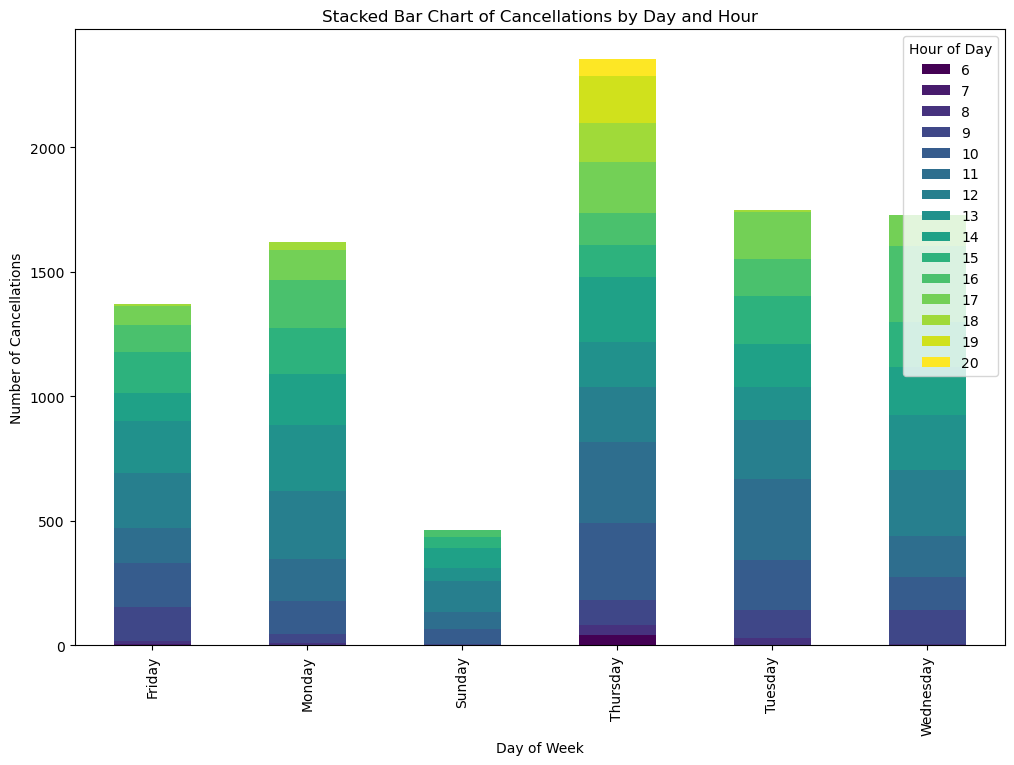

In [25]:
# Stacked bar chart for cancellations by day and hour
cancellation_stacked = canceled_transactions.groupby(['DayOfWeek', 'HourOfDay'])['InvoiceNo'].count().unstack()
cancellation_stacked.plot(kind='bar', stacked=True, cmap='viridis', figsize=(12, 8))
plt.xlabel('Day of Week')
plt.ylabel('Number of Cancellations')
plt.title('Stacked Bar Chart of Cancellations by Day and Hour')
plt.legend(title='Hour of Day')
plt.show()


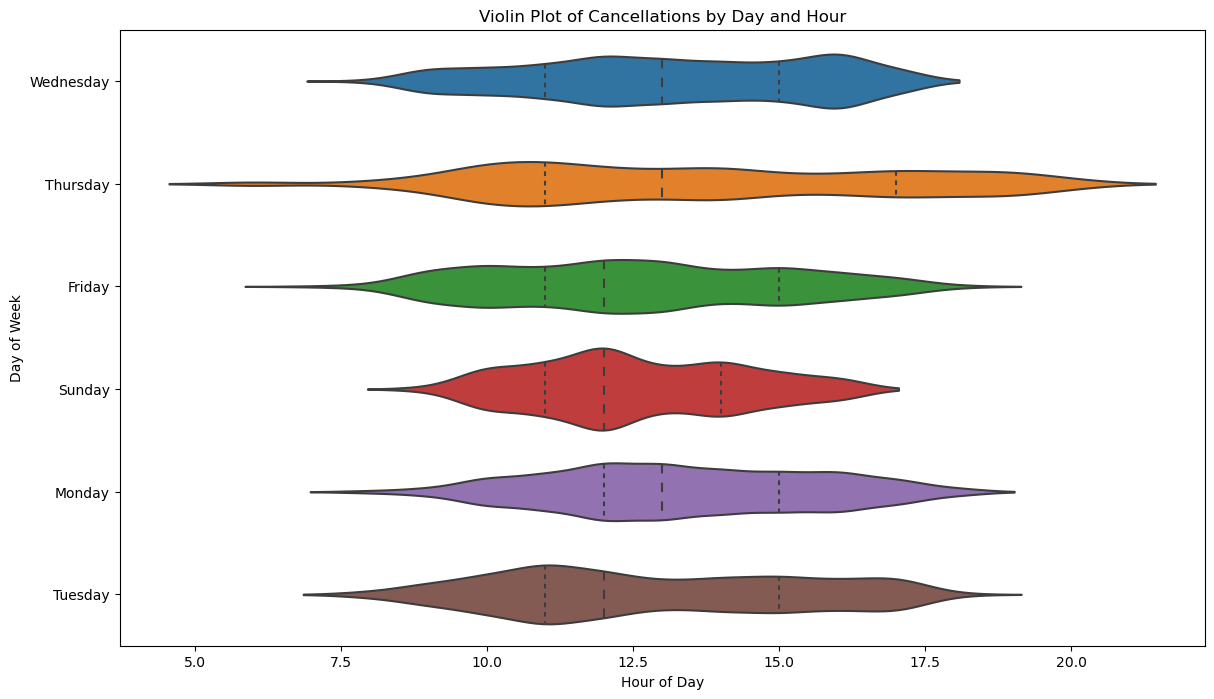

In [26]:
# Violin plot for cancellations by day and hour
plt.figure(figsize=(14, 8))
sns.violinplot(x='HourOfDay', y='DayOfWeek', data=canceled_transactions, cmap='Blues', inner='quartile')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Violin Plot of Cancellations by Day and Hour')
plt.show()


/var/folders/j4/8t1hkd6s73b83jybzsvpw5dc0000gn/T/ipykernel_71398/11976056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_transactions['DayOfWeek'] = canceled_transactions['InvoiceDate'].dt.day_name()
/var/folders/j4/8t1hkd6s73b83jybzsvpw5dc0000gn/T/ipykernel_71398/11976056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_transactions['HourOfDay'] = canceled_transactions['InvoiceDate'].dt.hour


<Figure size 1400x800 with 0 Axes>

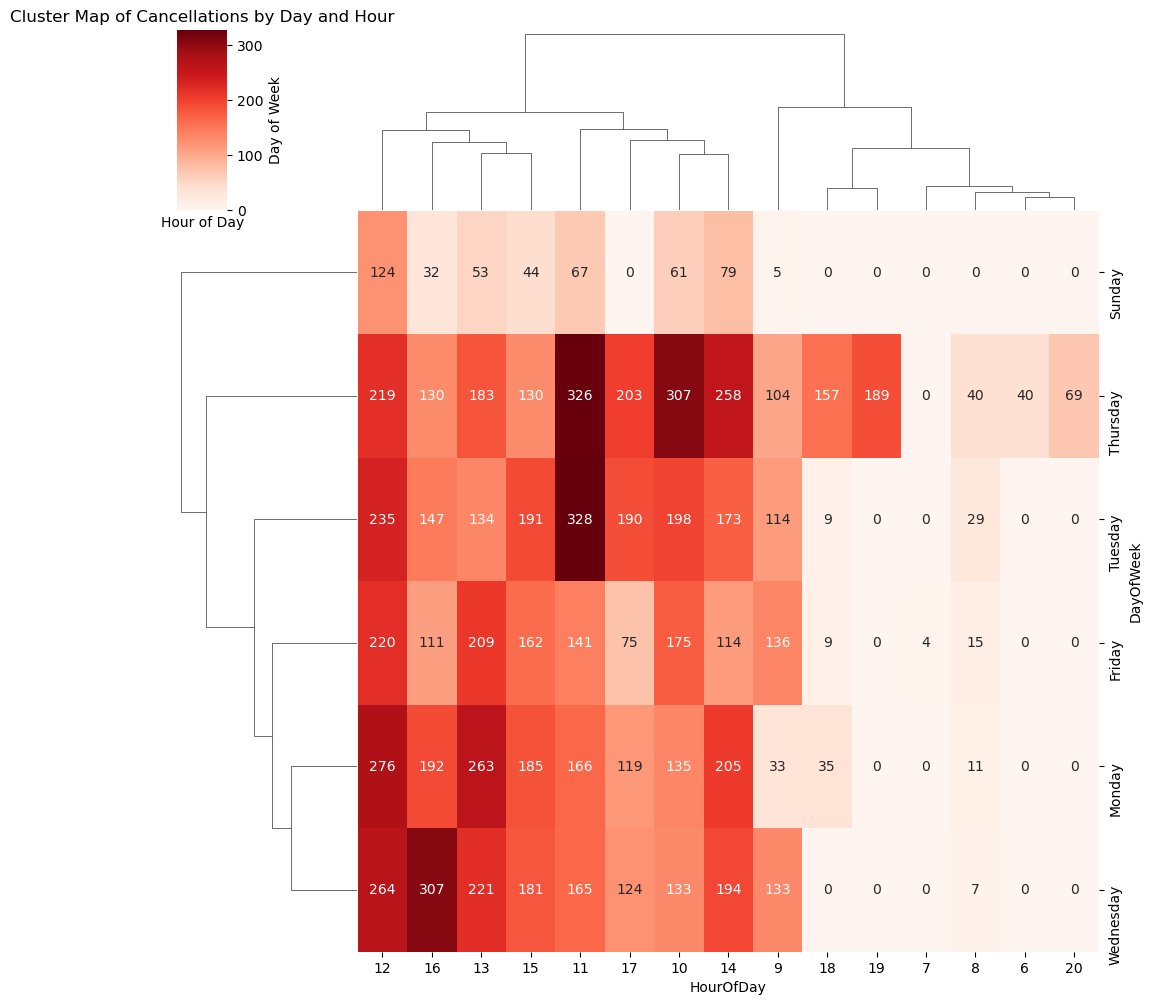

In [27]:
import seaborn as sns

# Assuming df is your DataFrame
canceled_transactions['DayOfWeek'] = canceled_transactions['InvoiceDate'].dt.day_name()
canceled_transactions['HourOfDay'] = canceled_transactions['InvoiceDate'].dt.hour

# Create a pivot table for cancellations by day and hour
cancellation_heatmap = canceled_transactions.groupby(['DayOfWeek', 'HourOfDay'])['InvoiceNo'].count().unstack()

# Fill NaN values with 0
cancellation_heatmap.fillna(0, inplace=True)

# Plotting the cluster map
plt.figure(figsize=(14, 8))
sns.clustermap(cancellation_heatmap, cmap='Reds', annot=True, fmt='g')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Cluster Map of Cancellations by Day and Hour')
plt.show()


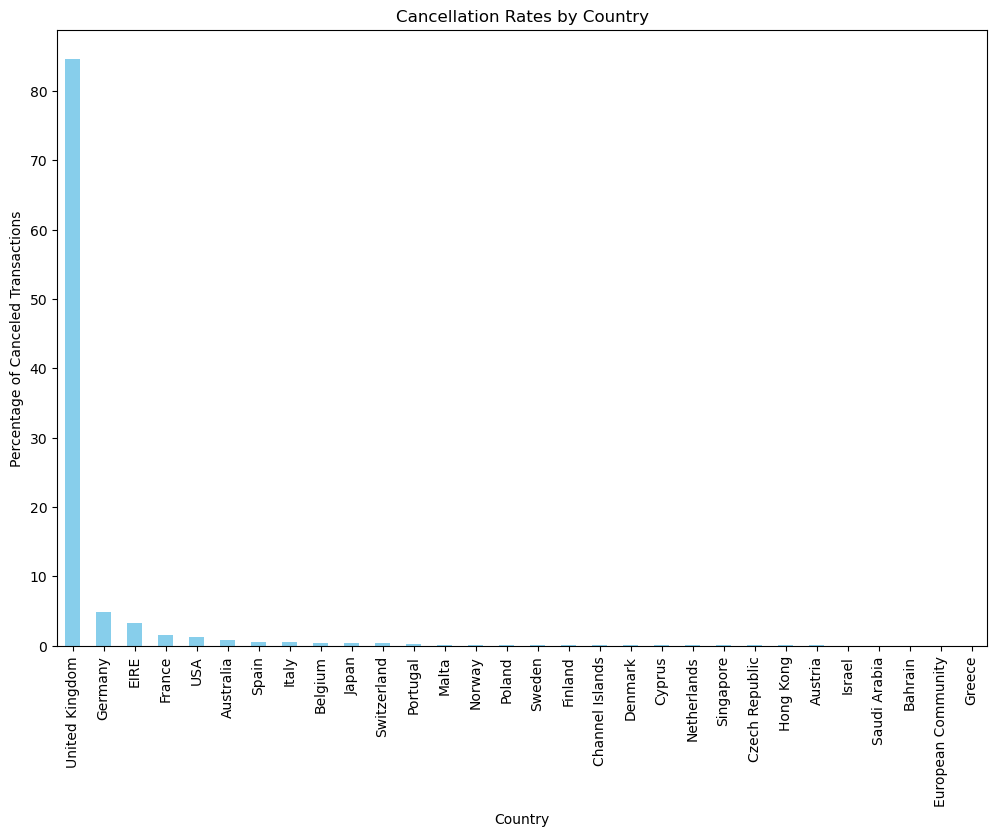

In [28]:
# Assuming df is your DataFrame and 'Country' is the column containing country information
cancellation_by_country = canceled_transactions['Country'].value_counts(normalize=True) * 100

# Plotting a bar plot for cancellation rates by country
plt.figure(figsize=(12, 8))
cancellation_by_country.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Percentage of Canceled Transactions')
plt.title('Cancellation Rates by Country')
plt.show()


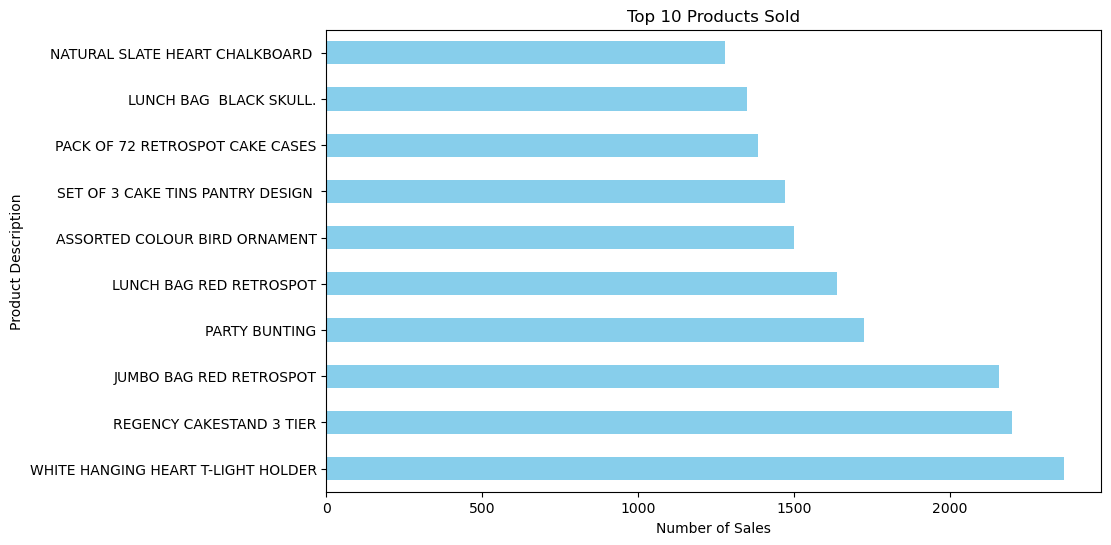

In [29]:
# Explore the distribution of products
top_products = df['Description'].value_counts().head(10)

# Plotting the bar graph for top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Sales')
plt.ylabel('Product Description')
plt.title('Top 10 Products Sold')
plt.show()


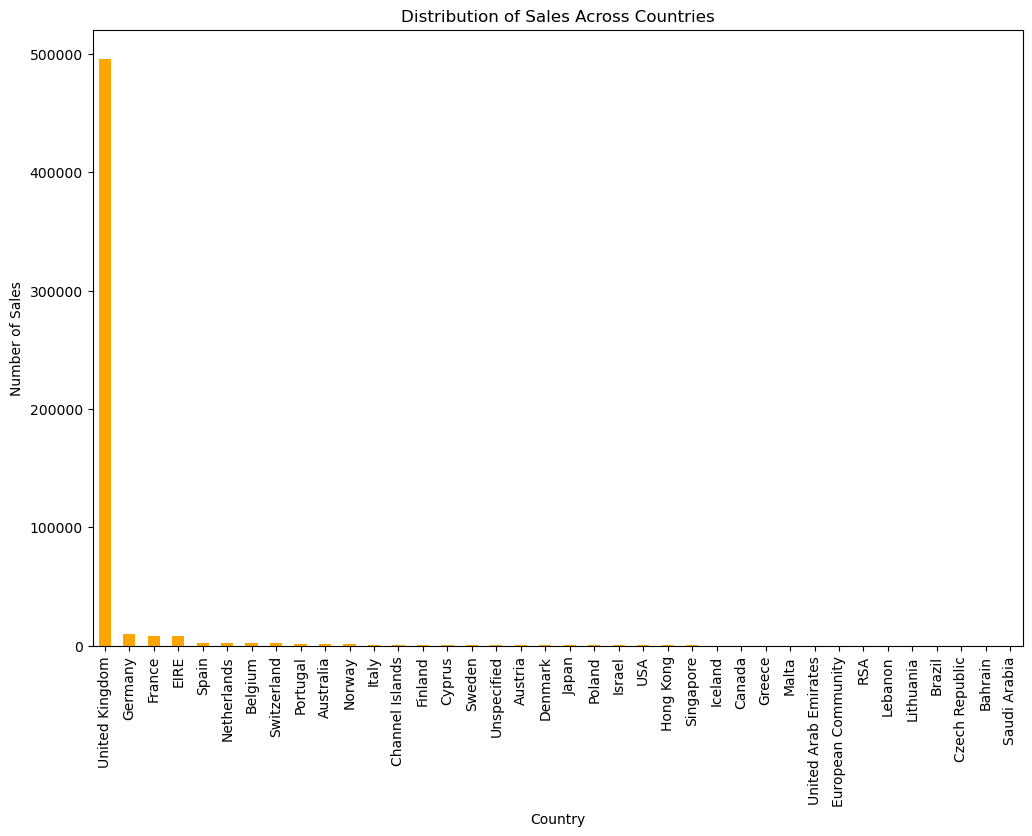

In [30]:
# Assuming df is your DataFrame and 'Country' is the column containing country information
country_distribution = df['Country'].value_counts()

# Plotting the bar graph for country distribution
plt.figure(figsize=(12, 8))
country_distribution.plot(kind='bar', color='orange')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sales Across Countries')
plt.show()


/var/folders/j4/8t1hkd6s73b83jybzsvpw5dc0000gn/T/ipykernel_71398/2166549640.py:26: UserWarning: 
The palette list has fewer values (12) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='InvoiceDate', y='Quantity', hue='Month', palette=palette, data=customer_segments, legend=False)


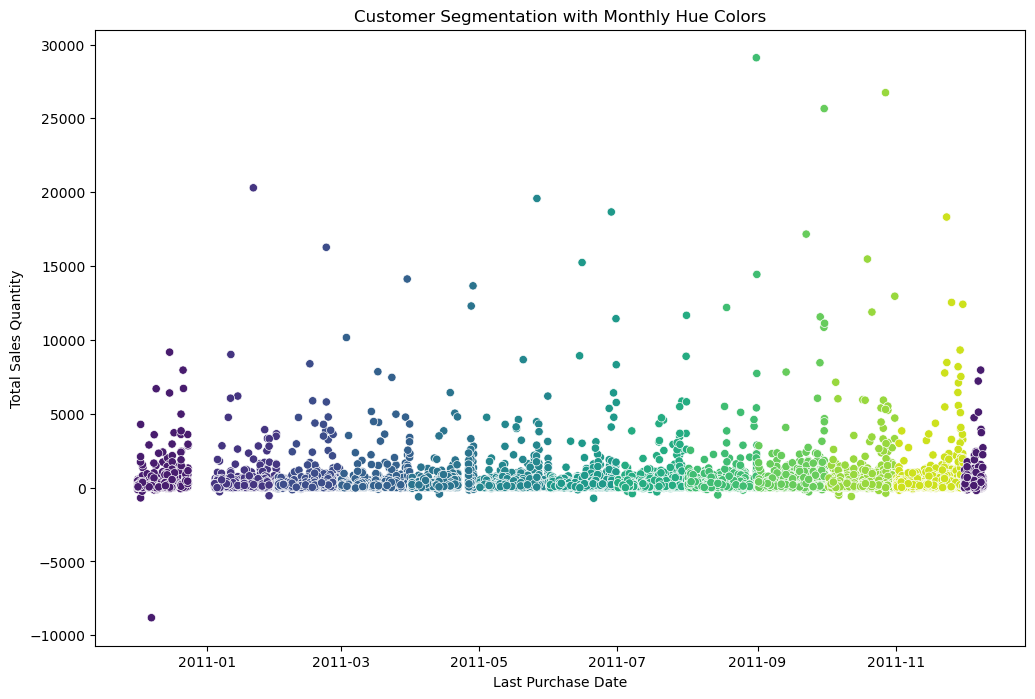

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'InvoiceDate' is the column containing dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Grouping by CustomerID, Year, and Month and calculating total sales
customer_segments = df.groupby(['CustomerID', 'Year', 'Month']).agg({'InvoiceDate': 'max', 'Quantity': 'sum'}).reset_index()

# Adding a 'Month' column to sort by month
customer_segments['Month'] = customer_segments['Year'] * 100 + customer_segments['Month']

# Sorting by Month for better visualization
customer_segments = customer_segments.sort_values('Month')

# Setting the color palette for each month
palette = sns.color_palette("viridis", n_colors=12)

# Visualizing customer segmentation with hue colors for each month
plt.figure(figsize=(12, 8))
sns.scatterplot(x='InvoiceDate', y='Quantity', hue='Month', palette=palette, data=customer_segments, legend=False)
plt.xlabel('Last Purchase Date')
plt.ylabel('Total Sales Quantity')
plt.title('Customer Segmentation with Monthly Hue Colors')
plt.show()


In [32]:
# Creating a "Total Sales" Column
df["Total_Sale"] = df["UnitPrice"]*df["Quantity"]
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Year,Month,Total_Sale
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,2010,12,20.34


In [63]:
# Assuming df is your DataFrame and 'Total_Sale' is the column containing total sales
df["Quarter"] = pd.PeriodIndex(df["InvoiceDate"], freq='Q')
quarter_sales = df.groupby("Quarter")["Total_Sale"].sum()

# Define custom colors for each quarter
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(dpi=100)
plt.pie(quarter_sales, labels=["2010 Q4", "2011 Q1", "2011 Q2", "2011 Q3", "2011 Q4"], autopct="%1.1f%%", colors=custom_colors)
plt.title("Quarter-wise Sales")
plt.show()


NameError: name 'pink' is not defined

<Figure size 640x480 with 0 Axes>

In [34]:
# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

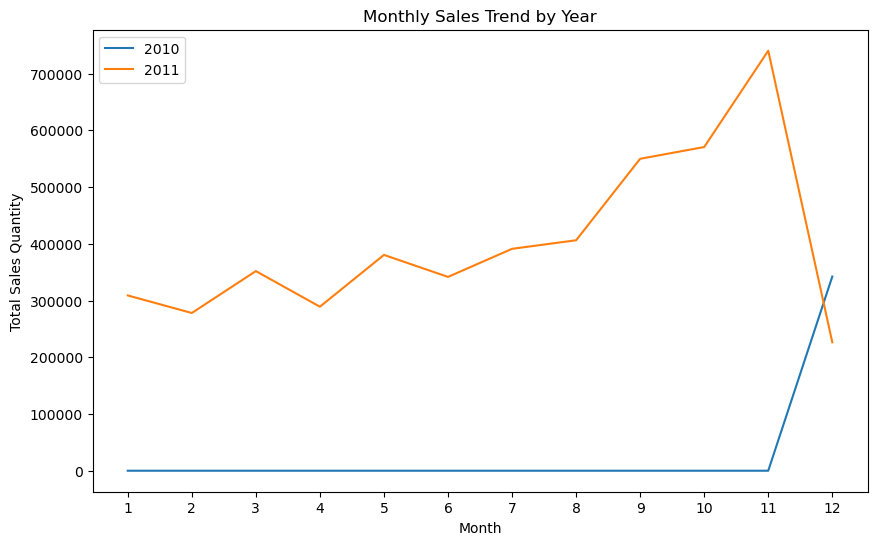

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Creating a DataFrame with all combinations of Year and Month
all_months = pd.DataFrame([(year, month) for year in df['Year'].unique() for month in range(1, 13)],
                           columns=['Year', 'Month'])

# Merging with monthly_sales to include all combinations
monthly_sales = pd.merge(all_months, df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index(),
                         on=['Year', 'Month'], how='left').fillna(0)

# Plotting the line graph
plt.figure(figsize=(10, 6))
for year in monthly_sales['Year'].unique():
    data = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(data['Month'], data['Quantity'], label=str(year))

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trend by Year')
plt.legend()

# Setting x-axis ticks to represent each month
plt.xticks(range(1, 13), range(1, 13))

plt.show()


As we can see the sales in last 2 months is high: festival and sale time

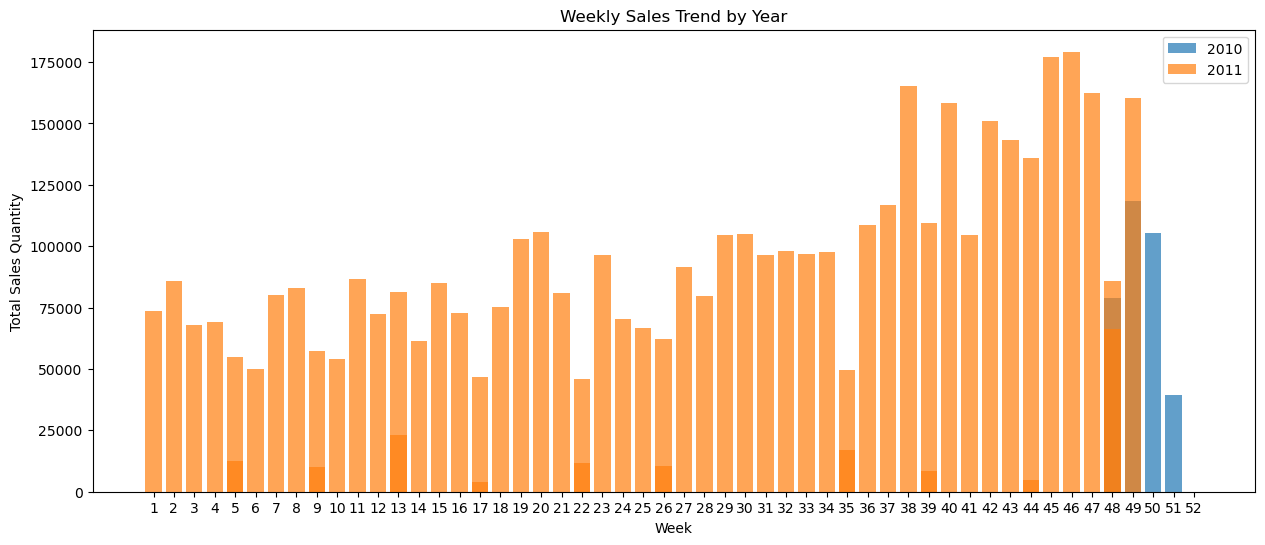

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and ISO Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Creating a DataFrame with all combinations of Year, Month, and Week
all_weeks = pd.DataFrame([(year, month, week) for year in df['Year'].unique() for month in range(1, 13) for week in range(1, 53)],
                          columns=['Year', 'Month', 'Week'])

# Merging with monthly_sales to include all combinations
weekly_sales = pd.merge(all_weeks, df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index(),
                        on=['Year', 'Month', 'Week'], how='left').fillna(0)

# Plotting the bar graph
plt.figure(figsize=(15, 6))
for year in weekly_sales['Year'].unique():
    data = weekly_sales[weekly_sales['Year'] == year]
    plt.bar(data['Week'], data['Quantity'], label=str(year), alpha=0.7)

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Total Sales Quantity')
plt.title('Weekly Sales Trend by Year')
plt.legend()

# Setting x-axis ticks to represent each week
plt.xticks(range(1, 53), range(1, 53))

plt.show()


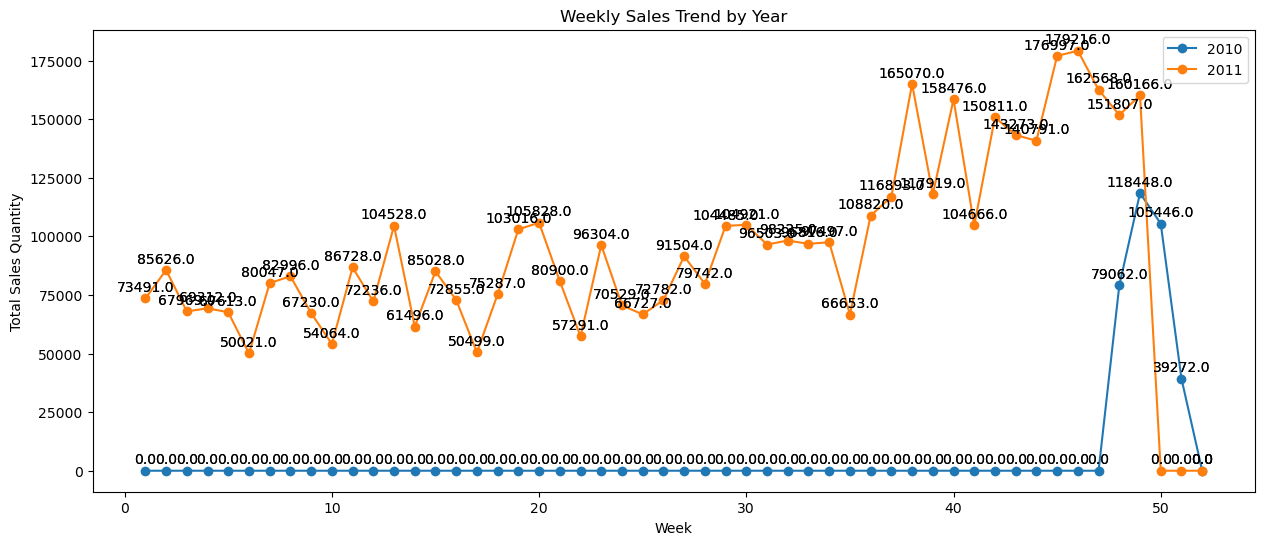

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and ISO Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Creating a DataFrame with all combinations of Year, Month, and Week
all_weeks = pd.DataFrame([(year, week) for year in df['Year'].unique() for week in range(1, 53)],
                          columns=['Year', 'Week'])

# Merging with weekly_sales to include all combinations
weekly_sales = pd.merge(all_weeks, df.groupby(['Year', 'Week'])['Quantity'].sum().reset_index(),
                        on=['Year', 'Week'], how='left').fillna(0)

# Plotting the line graph
plt.figure(figsize=(15, 6))
for year in weekly_sales['Year'].unique():
    data = weekly_sales[weekly_sales['Year'] == year]
    plt.plot(data['Week'], data['Quantity'], label=str(year), marker='o', linestyle='-')    # Annotating each point with the value
    for i, txt in enumerate(data['Quantity']):
        plt.annotate(txt, (data['Week'].iloc[i], data['Quantity'].iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    # Annotating each point with the value
    for i, txt in enumerate(data['Quantity']):
        plt.annotate(txt, (data['Week'].iloc[i], data['Quantity'].iloc[i]), textcoords="offset points", xytext=(0, 5), ha='center')
    

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Total Sales Quantity')
plt.title('Weekly Sales Trend by Year')
plt.legend()

plt.show()


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and ISO Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Creating a DataFrame with all combinations of Year, Month, and Week
all_weeks = pd.DataFrame([(year, month, week) for year in df['Year'].unique() for month in df['Month'].unique() for week in range(1, 53)],
                          columns=['Year', 'Month', 'Week'])

# Merging with weekly_sales to include all combinations
weekly_sales = pd.merge(all_weeks, df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index(),
                        on=['Year', 'Month', 'Week'], how='left').fillna(0)

# Filter out rows with quantity as 0
weekly_sales = weekly_sales[weekly_sales['Quantity'] != 0]

# Finding max and min sales for each week in every month
max_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].idxmax()
min_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].idxmin()

# Creating a single list with min and max sales side by side
result = pd.concat([weekly_sales.loc[min_sales, ['Year', 'Month', 'Week', 'Quantity']].reset_index(drop=True),
                    weekly_sales.loc[max_sales, ['Year', 'Month', 'Week', 'Quantity']].reset_index(drop=True)],
                   axis=1, keys=['Min Sales', 'Max Sales'])

# Printing the result
print(result)


   Min Sales                     Max Sales                     
        Year Month Week Quantity      Year Month Week  Quantity
0       2010    12   51  39272.0      2010    12   49  118448.0
1       2011     1    5  12568.0      2011     1    2   85626.0
2       2011     2    9   9880.0      2011     2    8   82996.0
3       2011     3   10  54064.0      2011     3   11   86728.0
4       2011     4   13  23034.0      2011     4   15   85028.0
5       2011     5   17   3814.0      2011     5   20  105828.0
6       2011     6   22  45745.0      2011     6   23   96304.0
7       2011     7   26  10464.0      2011     7   30  104921.0
8       2011     8   35  17158.0      2011     8   32   98225.0
9       2011     9   35  49495.0      2011     9   38  165070.0
10      2011    10   44   4926.0      2011    10   40  158476.0
11      2011    11   48  85640.0      2011    11   46  179216.0
12      2011    12   48  66167.0      2011    12   49  160166.0


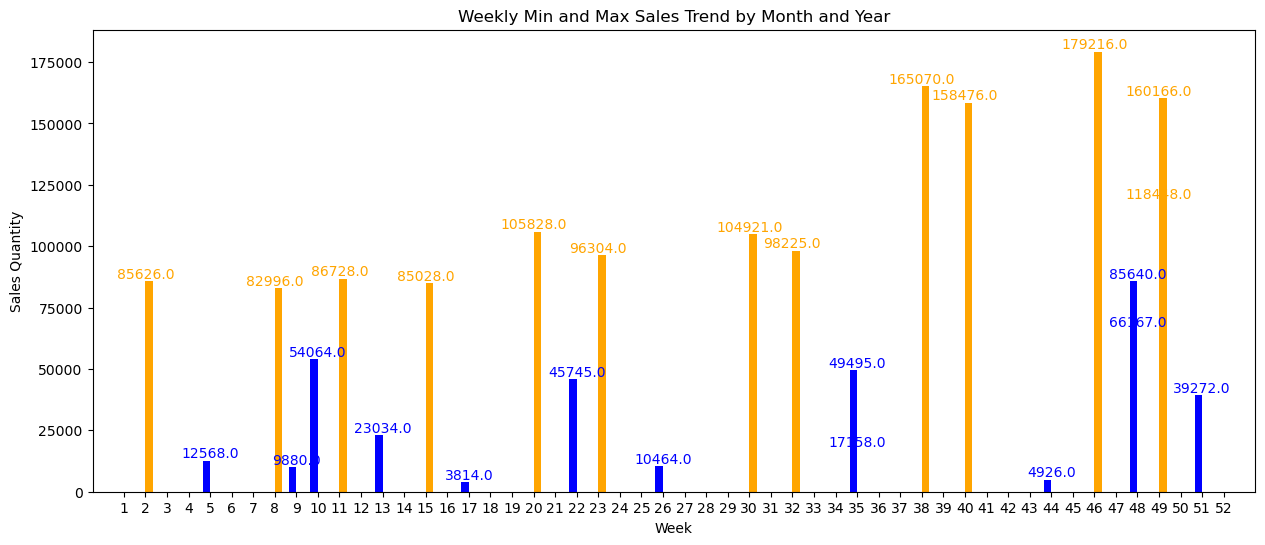

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and ISO Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Creating a DataFrame with all combinations of Year, Month, and Week
all_weeks = pd.DataFrame([(year, month, week) for year in df['Year'].unique() for month in df['Month'].unique() for week in range(1, 53)],
                          columns=['Year', 'Month', 'Week'])

# Merging with weekly_sales to include all combinations
weekly_sales = pd.merge(all_weeks, df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index(),
                        on=['Year', 'Month', 'Week'], how='left').fillna(0)

# Filter out rows with quantity as 0
weekly_sales = weekly_sales[weekly_sales['Quantity'] != 0]

# Finding max and min sales for each week in every month
max_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].idxmax()
min_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].idxmin()

# Creating a single list with min and max sales side by side
result = pd.concat([weekly_sales.loc[min_sales, ['Year', 'Month', 'Week', 'Quantity']].reset_index(drop=True),
                    weekly_sales.loc[max_sales, ['Year', 'Month', 'Week', 'Quantity']].reset_index(drop=True)],
                   axis=1, keys=['Min Sales', 'Max Sales'])

# Plotting the bar chart
bar_width = 0.35
fig, ax = plt.subplots(figsize=(15, 6))

for i, row in result.iterrows():
    min_week = row['Min Sales']['Week']
    max_week = row['Max Sales']['Week']
    min_quantity = row['Min Sales']['Quantity']
    max_quantity = row['Max Sales']['Quantity']

    ax.bar(min_week - bar_width / 2, min_quantity, bar_width, label=f'Min - {min_quantity}', color='blue')
    ax.bar(max_week + bar_width / 2, max_quantity, bar_width, label=f'Max - {max_quantity}', color='orange')

    # Adding values on top of the bars
    ax.text(min_week, min_quantity + 5, str(min_quantity), ha='center', va='bottom', color='blue')
    ax.text(max_week, max_quantity + 5, str(max_quantity), ha='center', va='bottom', color='orange')

# Adding labels and title
ax.set_xlabel('Week')
ax.set_ylabel('Sales Quantity')
ax.set_title('Weekly Min and Max Sales Trend by Month and Year')

# Setting x-axis ticks to represent every week
ax.set_xticks(range(1, 53))

plt.show()


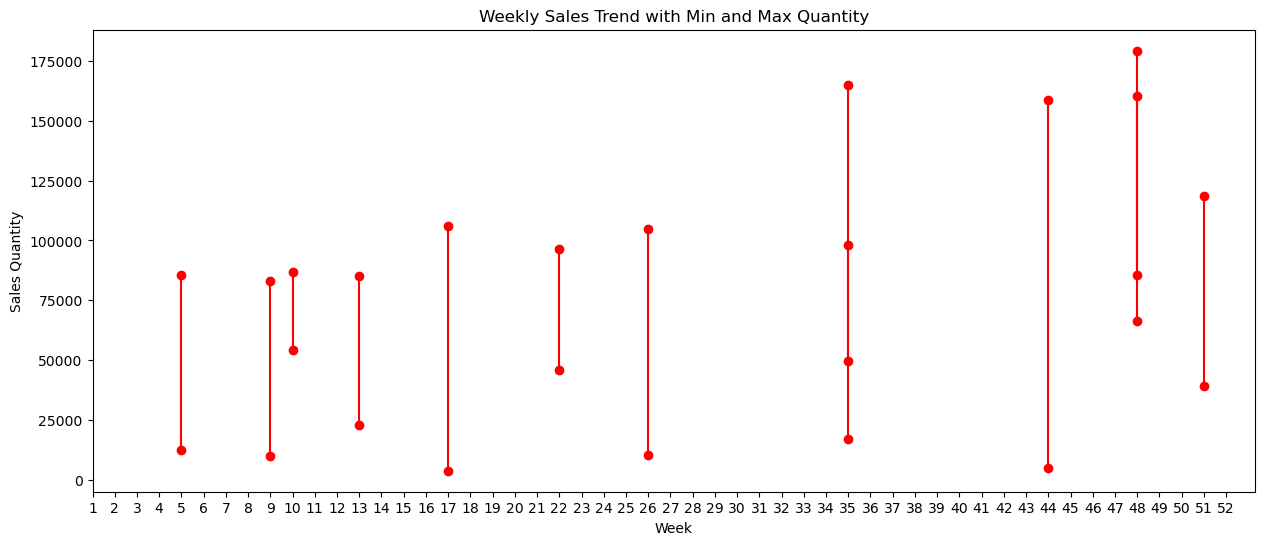

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and ISO Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Creating a DataFrame with all combinations of Year, Month, and Week
all_weeks = pd.DataFrame([(year, month, week) for year in df['Year'].unique() for month in df['Month'].unique() for week in range(1, 53)],
                          columns=['Year', 'Month', 'Week'])

# Merging with weekly_sales to include all combinations
weekly_sales = pd.merge(all_weeks, df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index(),
                        on=['Year', 'Month', 'Week'], how='left').fillna(0)

# Filter out rows with quantity as 0
weekly_sales = weekly_sales[weekly_sales['Quantity'] != 0]

# Finding max and min sales for each week in every month
max_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].idxmax()
min_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].idxmin()

# Creating a single list with columns for Year, Month, Week, Min Quantity, and Max Quantity
result = pd.concat([weekly_sales.loc[min_sales, ['Year', 'Month', 'Week', 'Quantity']].reset_index(drop=True),
                    weekly_sales.loc[max_sales, ['Quantity']].reset_index(drop=True)],
                   axis=1)

# Renaming the columns
result.columns = ['Year', 'Month', 'Week', 'Min Quantity', 'Max Quantity']

# Plotting the line graph
plt.figure(figsize=(15, 6))
for i, row in result.iterrows():
    plt.plot([row['Week'], row['Week']], [row['Min Quantity'], row['Max Quantity']], marker='o', color='red', linestyle='-')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Sales Quantity')
plt.title('Weekly Sales Trend with Min and Max Quantity')

# Setting x-axis ticks to represent every week
plt.xticks(range(1, 53))

plt.show()


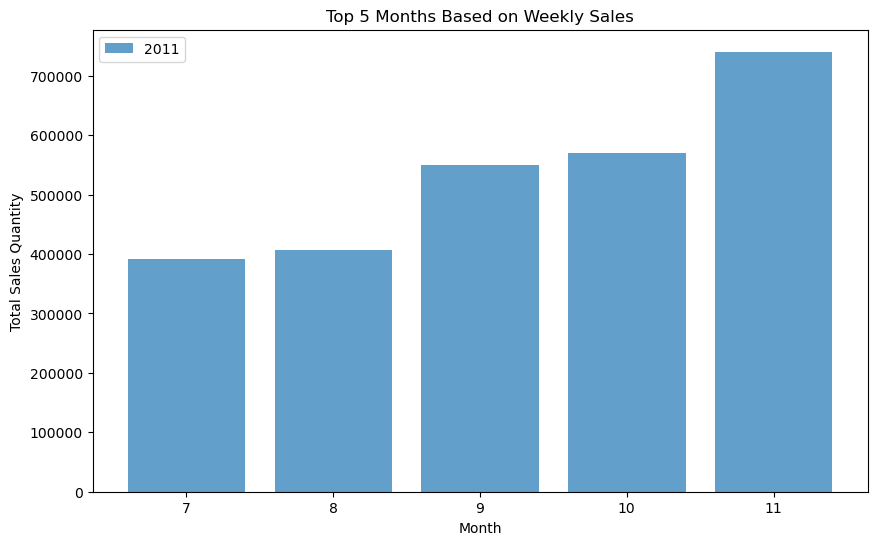

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Grouping by Year, Month, and Week and calculating total sales
weekly_sales = df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index()

# Summing up the quantities for each month
monthly_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Sorting months based on total sales
top_months = monthly_sales.sort_values(by='Quantity', ascending=False).head(5)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
for year in top_months['Year'].unique():
    data = top_months[top_months['Year'] == year]
    plt.bar(data['Month'], data['Quantity'], label=str(year),alpha=0.7)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Top 5 Months Based on Weekly Sales')
plt.legend()
plt.show()


In [42]:
import pandas as pd

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Grouping by Year, Month, and calculating total sales
monthly_sales = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Sorting months based on total sales
top_months = monthly_sales.sort_values(by='Quantity', ascending=False).head(5)

# Displaying the top 5 months
print(top_months)


    Year  Month  Quantity
11  2011     11    740286
10  2011     10    570532
9   2011      9    549817
8   2011      8    406199
7   2011      7    391116


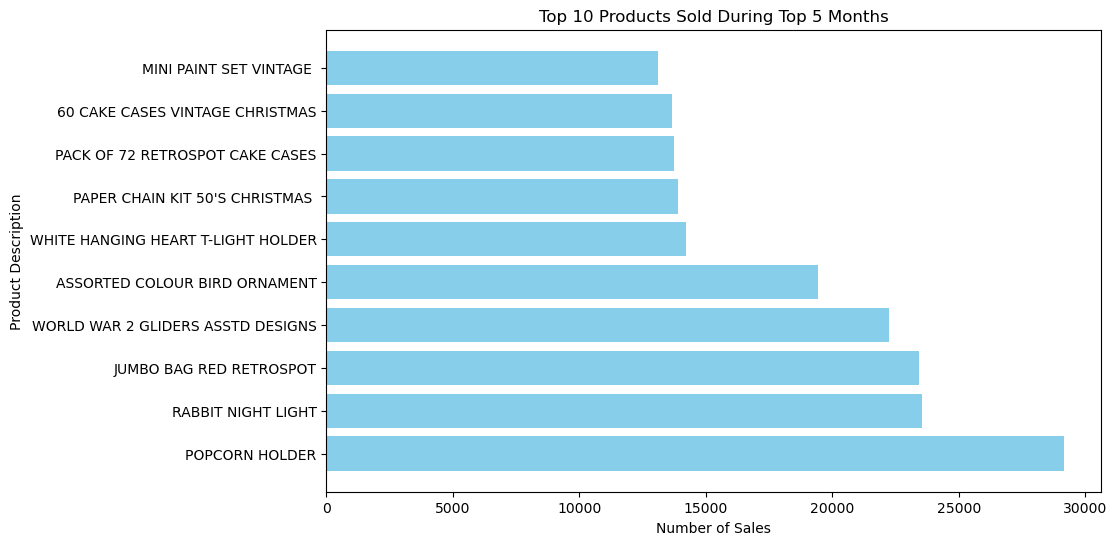

In [43]:
# Extracting the descriptions of items during the top 5 months
top_months_data = df[(df['Year'].isin(top_months['Year'])) & (df['Month'].isin(top_months['Month']))]

# Displaying the products sold during the top 5 months
top_products = top_months_data[['Description', 'Quantity']].groupby('Description').sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

# Plotting the bar graph for top products
plt.figure(figsize=(10, 6))
plt.barh(top_products['Description'], top_products['Quantity'], color='skyblue')
plt.xlabel('Number of Sales')
plt.ylabel('Product Description')
plt.title('Top 10 Products Sold During Top 5 Months')
plt.show()


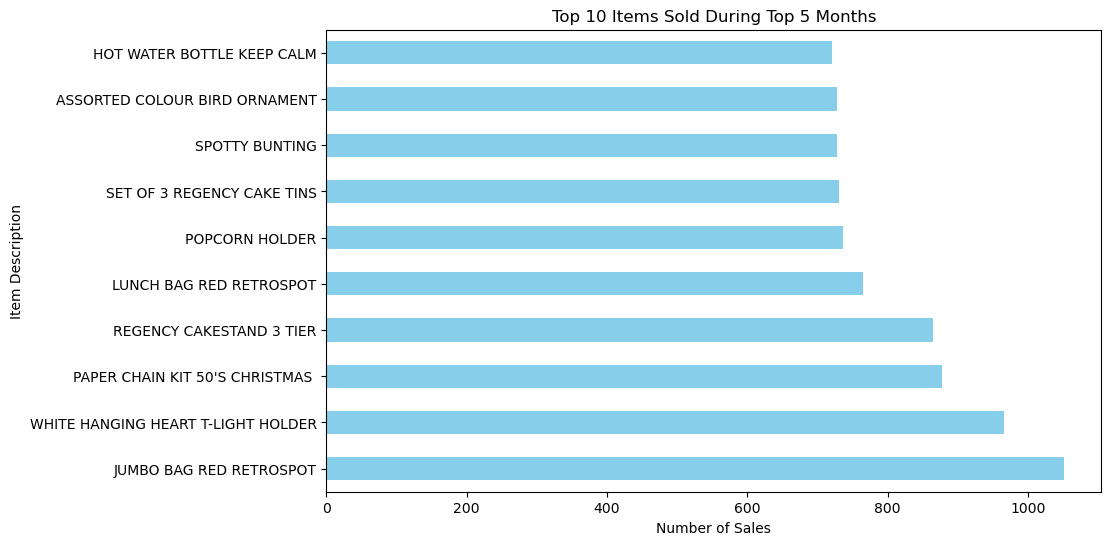

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Grouping by Year, Month, and Week and calculating total sales
weekly_sales = df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index()

# Summing up the quantities for each month
monthly_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Sorting months based on total sales
top_months = monthly_sales.sort_values(by='Quantity', ascending=False).head(5)

# Extracting the descriptions of items during the top 5 months
top_months_data = df[(df['Year'].isin(top_months['Year'])) & (df['Month'].isin(top_months['Month']))]

# Counting the occurrences of each item
top_items = top_months_data['Description'].value_counts().head(10)

# Plotting the bar graph for top items with x-axis and y-axis swapped
plt.figure(figsize=(10, 6))
top_items.plot(kind='barh', color='skyblue')  # Change 'bar' to 'barh'
plt.ylabel('Item Description')  # Swap xlabel and ylabel
plt.xlabel('Number of Sales')    # Swap xlabel and ylabel
plt.title('Top 10 Items Sold During Top 5 Months')
plt.show()


In [70]:
import pandas as pd

# Assuming df is your DataFrame

# Top 10 products overall
top_10_items_overall = df['Description'].value_counts().head(10)
print("Top 10 Products Overall:")
print(top_10_items_overall)

# Extracting the descriptions of items during the top 5 months
top_5_months_data = df[(df['Year'].isin(top_months['Year'])) & (df['Month'].isin(top_months['Month']))]

# Top 10 products in the top 5 months
top_10_items_top_5_months = top_5_months_data['Description'].value_counts().head(10)
print("\nTop 10 Products in Top 5 Months:")
print(top_10_items_top_5_months)

# Finding common products
common_products = set(top_10_items_overall.index) & set(top_10_items_top_5_months.index)

# Displaying common products
print("\nCommon Products:")
print(common_products)
# Comment: This provides a set of common products between the top 10 items overall and the top 10 items in the top 5 months.


Top 10 Products Overall:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
NATURAL SLATE HEART CHALKBOARD        1280
Name: count, dtype: int64

Top 10 Products in Top 5 Months:
Description
JUMBO BAG RED RETROSPOT               1052
WHITE HANGING HEART T-LIGHT HOLDER     966
PAPER CHAIN KIT 50'S CHRISTMAS         878
REGENCY CAKESTAND 3 TIER               865
LUNCH BAG RED RETROSPOT                765
POPCORN HOLDER                         736
SET OF 3 REGENCY CAKE TINS             730
SPOTTY BUNTING                         728
ASSORTED COLOUR BIRD ORNAMENT          728
HOT WATER BOTTLE KEEP CALM             720
Name: count, dtype: int64

Comm

<Figure size 1200x800 with 0 Axes>

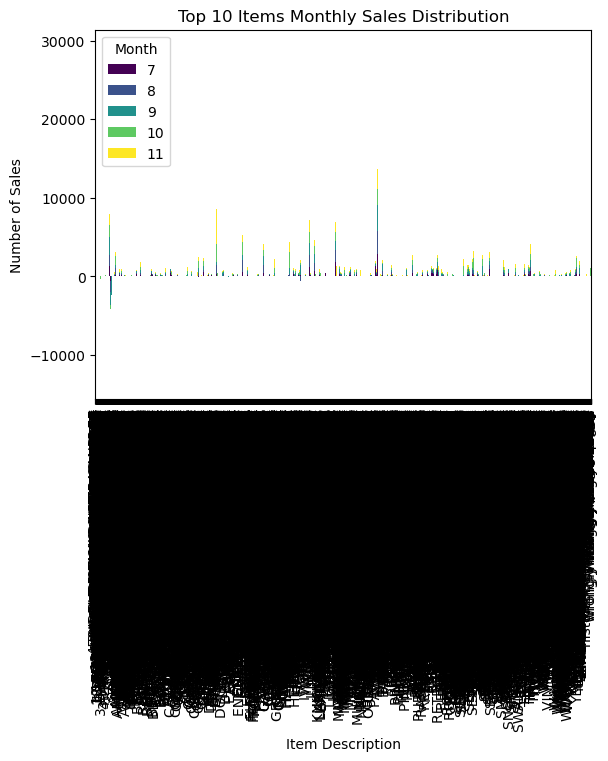

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Grouping by Year, Month, and Week and calculating total sales
weekly_sales = df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index()

# Summing up the quantities for each month
monthly_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Sorting months based on total sales
top_months = monthly_sales.sort_values(by='Quantity', ascending=False).head(5)

# Extracting the descriptions of items during the top 5 months
top_months_data = df[(df['Year'].isin(top_months['Year'])) & (df['Month'].isin(top_months['Month']))]

# Counting the occurrences of each item
top_items = top_months_data['Description'].value_counts().head(10)

# Grouping by Month and Item Description and calculating total sales
top_items_monthly = top_months_data.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# Creating a pivot table for easy plotting
pivot_table = top_items_monthly.pivot(index='Description', columns='Month', values='Quantity')

# Plotting the bar graph
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Item Description')
plt.ylabel('Number of Sales')
plt.title('Top 10 Items Monthly Sales Distribution')
plt.legend(title='Month')
plt.show()


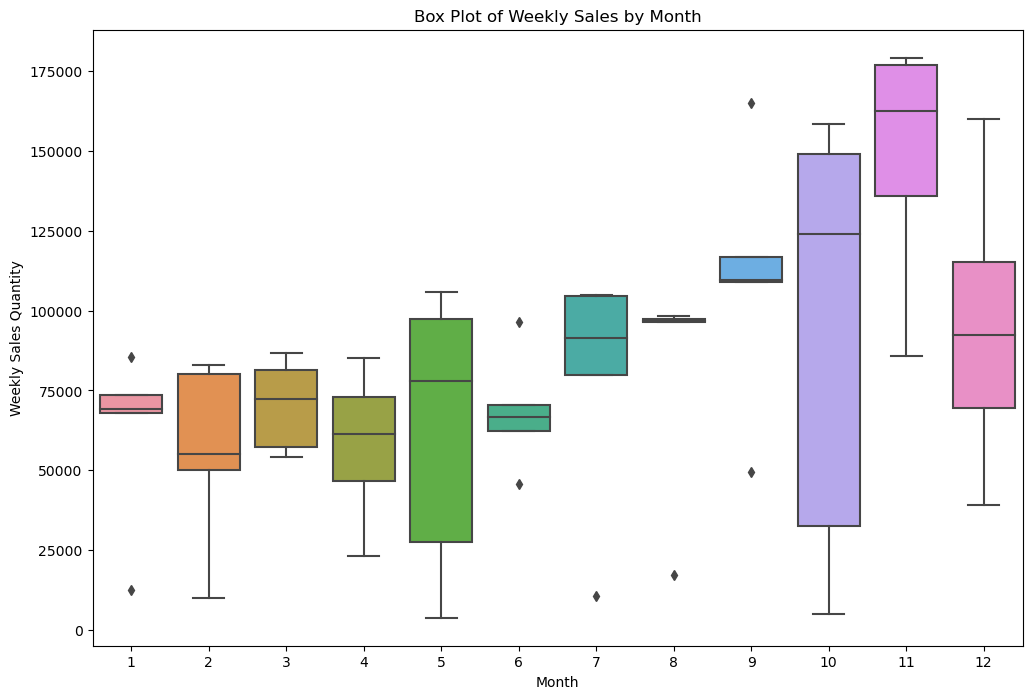

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Grouping by Year, Month, and Week and calculating total sales
weekly_sales = df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index()

# Creating a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Month', y='Quantity', data=weekly_sales)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Weekly Sales Quantity')
plt.title('Box Plot of Weekly Sales by Month')
plt.show()


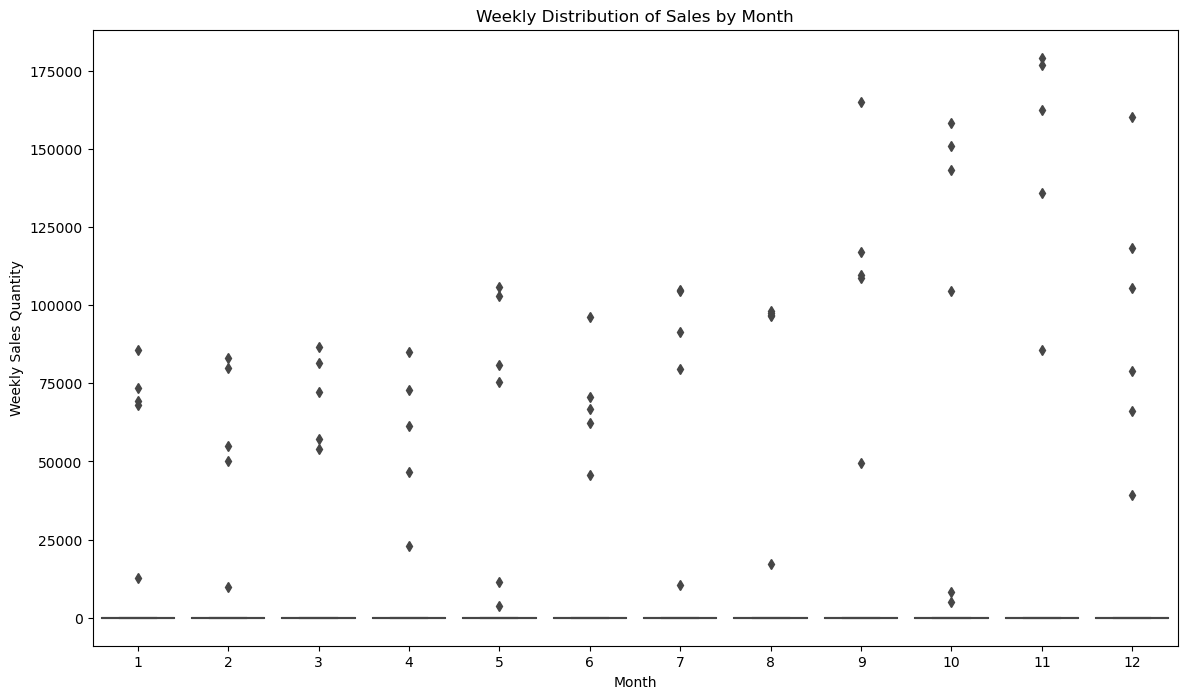

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Creating a DataFrame with all combinations of Year, Month, and Week
all_weeks = pd.DataFrame([(year, month, week) for year in df['Year'].unique() for month in range(1, 13) for week in range(1, 53)],
                          columns=['Year', 'Month', 'Week'])

# Merging the DataFrame with actual sales data
sales_by_week = pd.merge(all_weeks, df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index(), on=['Year', 'Month', 'Week'], how='left')
sales_by_week['Quantity'] = sales_by_week['Quantity'].fillna(0)  # Fill NaN with 0 for weeks with no sales

# Plotting the box plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='Month', y='Quantity', data=sales_by_week)
plt.title('Weekly Distribution of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales Quantity')
plt.show()


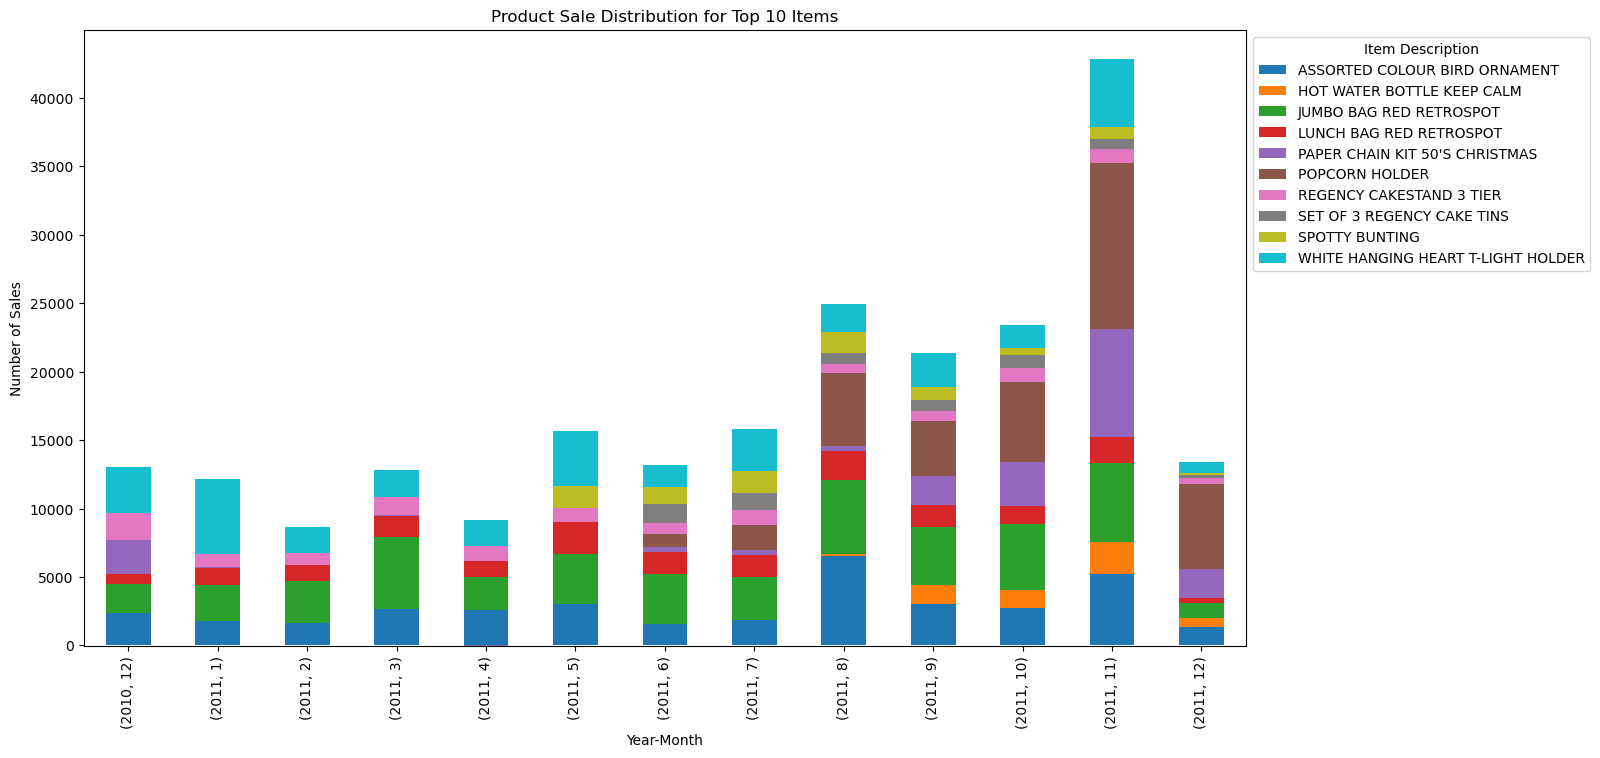

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Date' is the column containing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, and Week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

# Grouping by Year, Month, and Week and calculating total sales
weekly_sales = df.groupby(['Year', 'Month', 'Week'])['Quantity'].sum().reset_index()

# Summing up the quantities for each month
monthly_sales = weekly_sales.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

# Sorting months based on total sales
top_months = monthly_sales.sort_values(by='Quantity', ascending=False).head(5)

# Extracting the descriptions of items during the top 5 months
top_months_data = df[(df['Year'].isin(top_months['Year'])) & (df['Month'].isin(top_months['Month']))]

# Counting the occurrences of each item
top_items = top_months_data['Description'].value_counts().head(10)

# Extracting data for the top 10 items
top_items_data = df[df['Description'].isin(top_items.index)]

# Creating a pivot table for product sale distribution
product_distribution = top_items_data.pivot_table(index=['Year', 'Month'], columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Plotting the product sale distribution
fig, ax = plt.subplots(figsize=(15, 8))
product_distribution.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Year-Month')
plt.ylabel('Number of Sales')
plt.title('Product Sale Distribution for Top 10 Items')
plt.legend(title='Item Description', bbox_to_anchor=(1, 1))
plt.show()


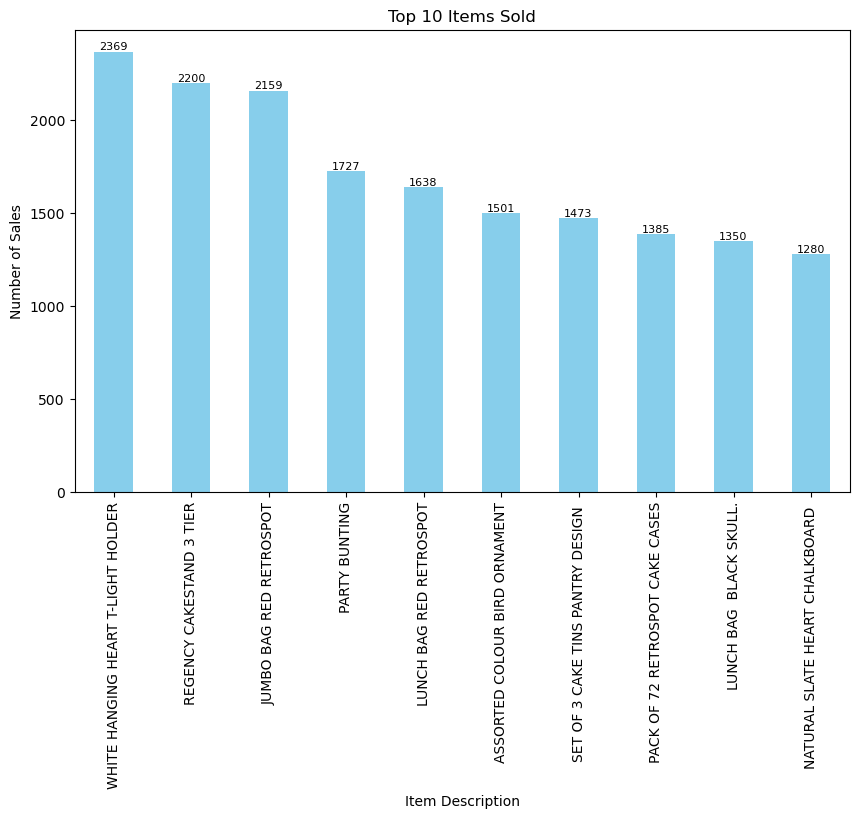

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
top_items = df['Description'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bar_plot = top_items.plot(kind='bar', color='skyblue')
plt.xlabel('Item Description')
plt.ylabel('Number of Sales')
plt.title('Top 10 Items Sold')

# Adding values on top of the bars
for index, value in enumerate(top_items):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

plt.show()


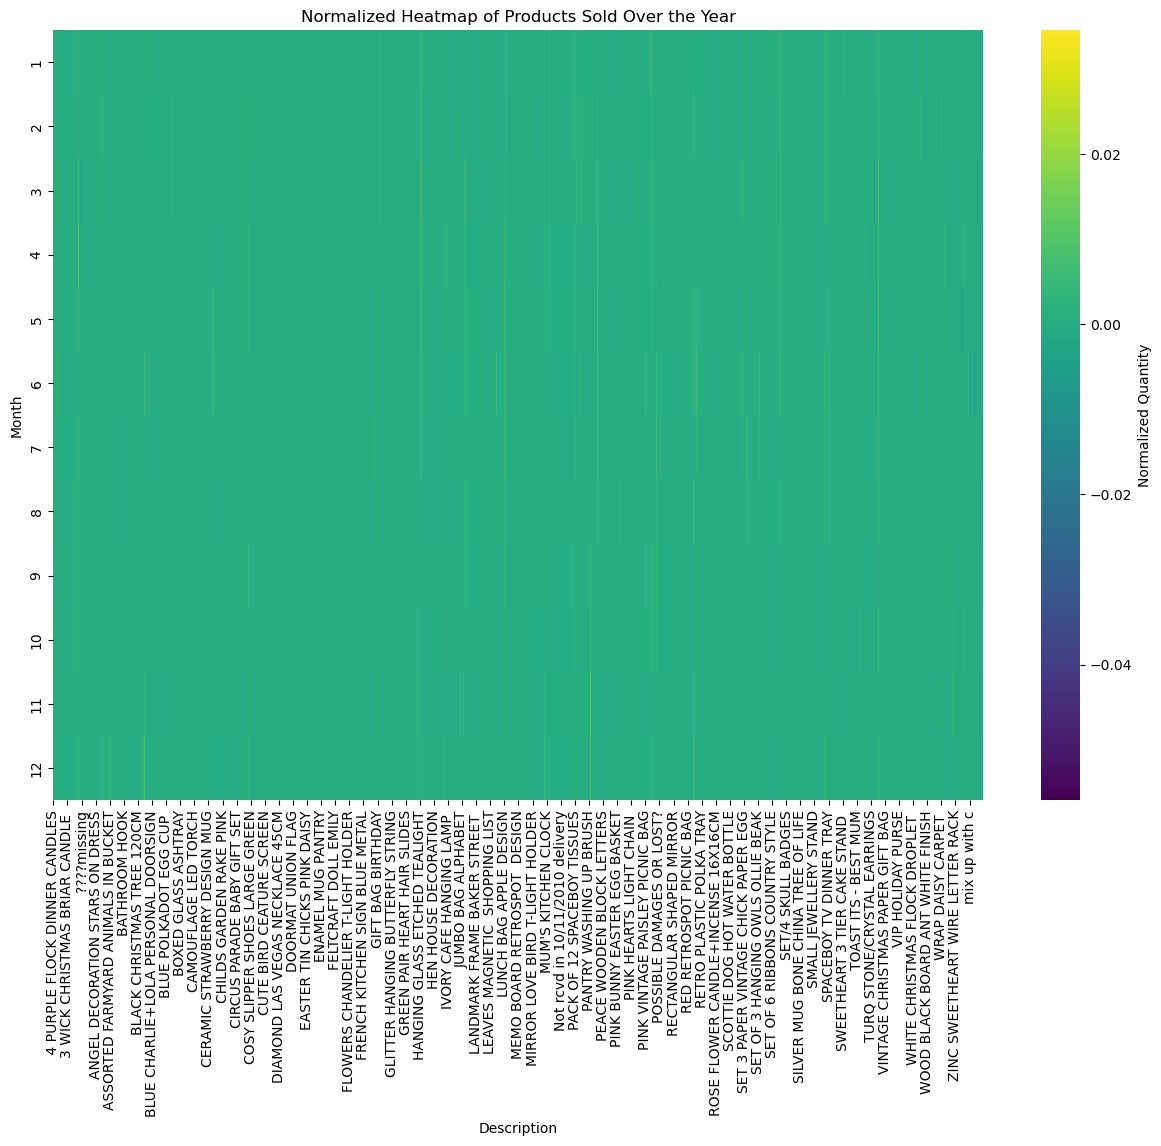

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'InvoiceDate', 'Description', and 'Quantity' are relevant columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

# Grouping by 'Month' and 'Description' to get the total quantity for each product per month
product_sales = df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# Pivot the DataFrame to get 'Description' as columns
heatmap_data = product_sales.pivot(index='Month', columns='Description', values='Quantity').fillna(0)

# Normalize the data to better visualize variations
normalized_heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(normalized_heatmap_data, cmap='viridis', cbar_kws={'label': 'Normalized Quantity'})
plt.title('Normalized Heatmap of Products Sold Over the Year')
plt.show()


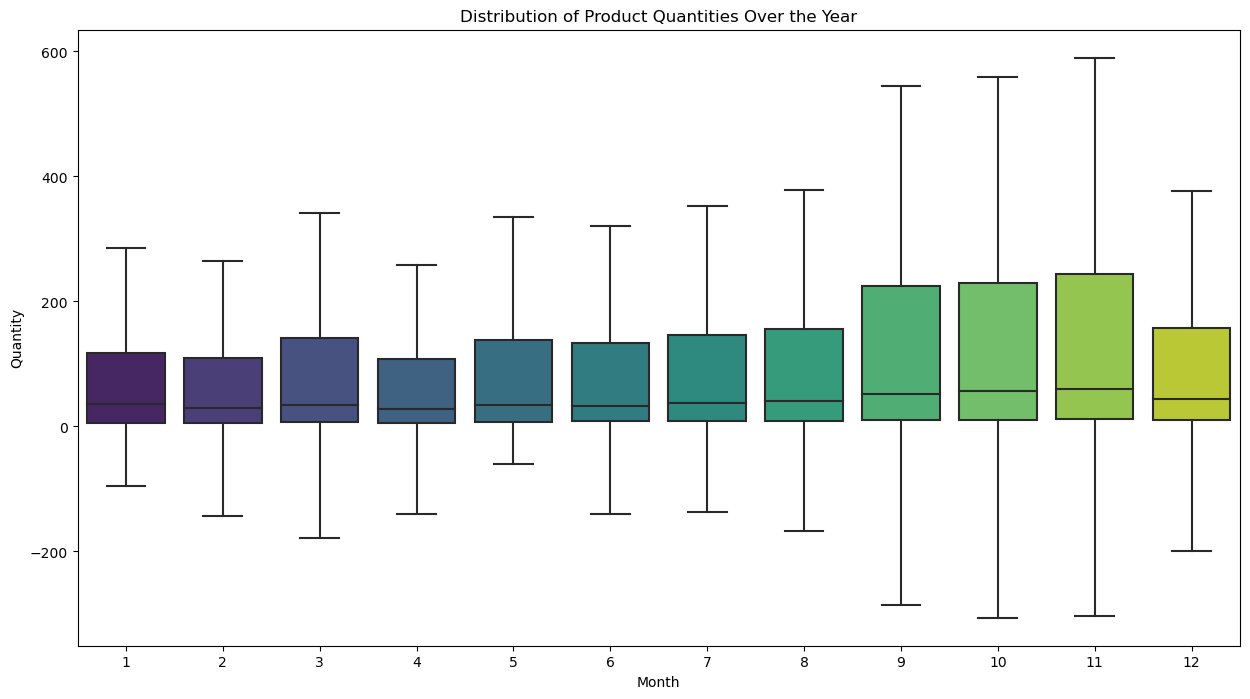

In [53]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month', y='Quantity', data=product_sales, showfliers=False, palette='viridis')
plt.title('Distribution of Product Quantities Over the Year')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()


In [55]:
top_products_per_month = product_sales.groupby('Month')['Quantity'].nlargest(5).reset_index(level=0, drop=True).reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x='Quantity', y='Description', hue='Month', data=top_products_per_month, palette='viridis')
plt.title('Top 5 Products Sold Each Month')
plt.xlabel('Quantity')
plt.ylabel('Product Description')
plt.show()


ValueError: Could not interpret input 'Description'

<Figure size 1500x800 with 0 Axes>

Correlation Matrix:
           Quantity  UnitPrice
Quantity   1.000000  -0.001235
UnitPrice -0.001235   1.000000


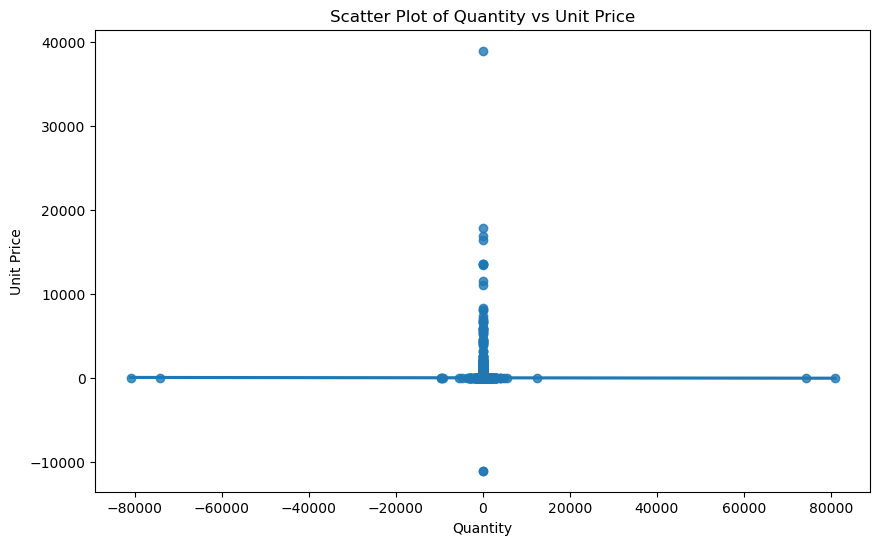

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace 'Quantity' and 'UnitPrice' with your actual column names
correlation_df = df[['Quantity', 'UnitPrice']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Scatter Plot of Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()


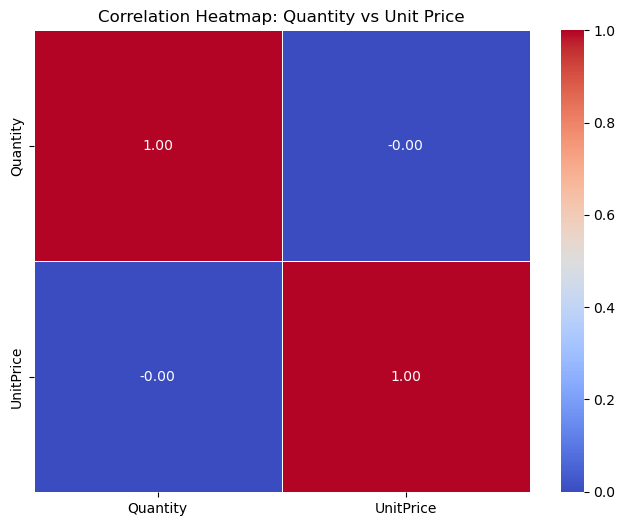

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace 'Quantity' and 'UnitPrice' with your actual column names
correlation_df = df[['Quantity', 'UnitPrice']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap: Quantity vs Unit Price')
plt.show()


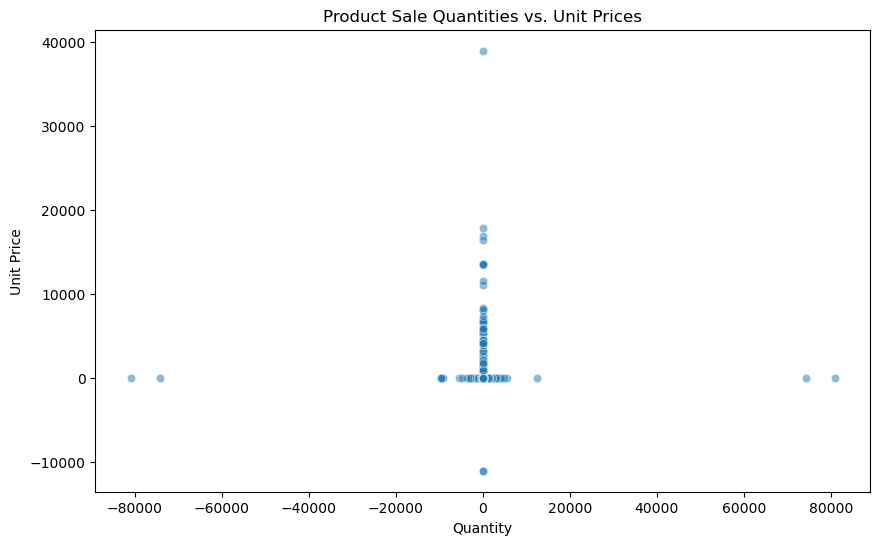

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with columns 'Quantity' and 'UnitPrice'
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, alpha=0.5)

# Adding labels and title
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Product Sale Quantities vs. Unit Prices')

plt.show()


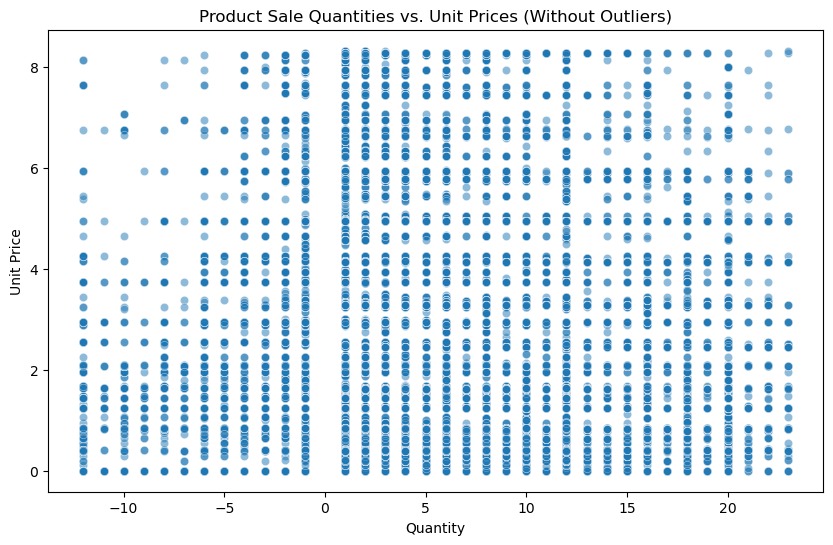

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with columns 'Quantity' and 'UnitPrice'
plt.figure(figsize=(10, 6))

# Calculate the IQR for Quantity and UnitPrice
Q1_quantity = df['Quantity'].quantile(0.25)
Q3_quantity = df['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_price = df['UnitPrice'].quantile(0.25)
Q3_price = df['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define the upper and lower bounds for filtering outliers
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filter out outliers
filtered_df = df[(df['Quantity'] >= lower_bound_quantity) & (df['Quantity'] <= upper_bound_quantity) &
                 (df['UnitPrice'] >= lower_bound_price) & (df['UnitPrice'] <= upper_bound_price)]

# Scatter plot without outliers
sns.scatterplot(x='Quantity', y='UnitPrice', data=filtered_df, alpha=0.5)

# Adding labels and title
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Product Sale Quantities vs. Unit Prices (Without Outliers)')

plt.show()


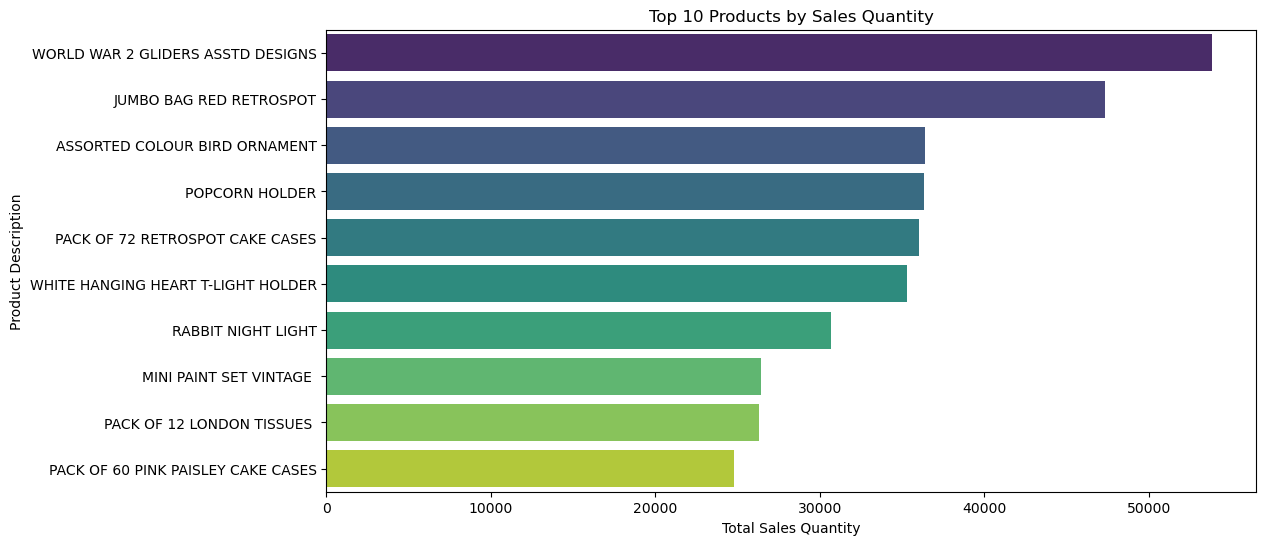

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Description' is the column containing product names
# 'Quantity' represents the number of units sold for each product
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Sorting products by sales in descending order
product_sales = product_sales.sort_values(by='Quantity', ascending=False)

# Selecting the top N products (adjust N based on your preference)
top_n_products = 10
top_products = product_sales.head(top_n_products)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=top_products, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Description')
plt.title(f'Top {top_n_products} Products by Sales Quantity')
plt.show()


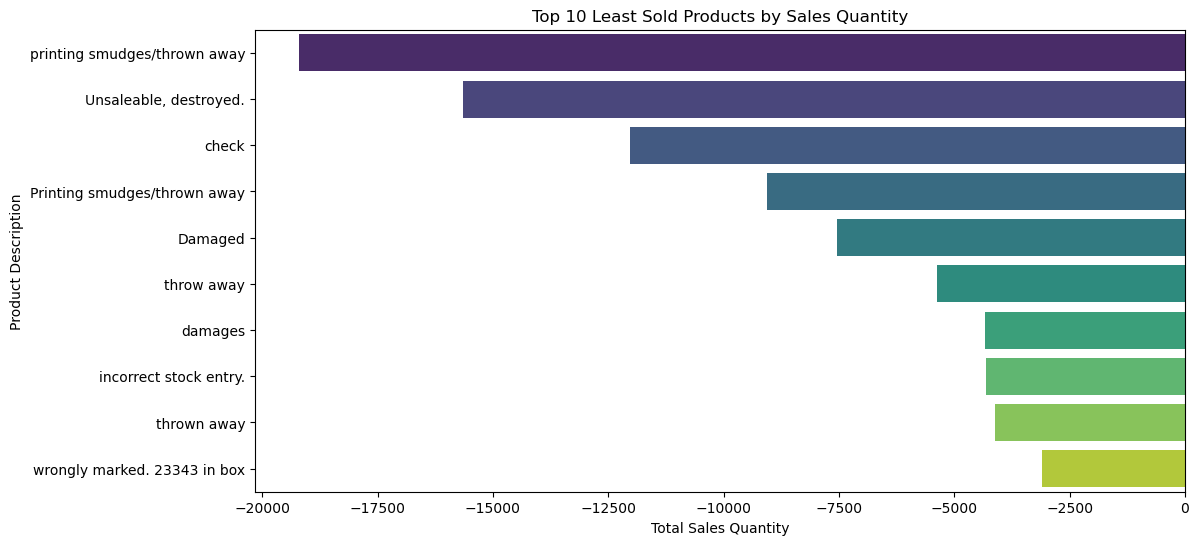

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Description' is the column containing product names
# 'Quantity' represents the number of units sold for each product
product_sales = df.groupby('Description')['Quantity'].sum().reset_index()

# Sorting products by sales in ascending order
product_sales = product_sales.sort_values(by='Quantity', ascending=True)

# Selecting the 10 least sold products
least_sold_products = product_sales.head(10)

# Plotting the bar chart for least sold products
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Description', data=least_sold_products, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Product Description')
plt.title('Top 10 Least Sold Products by Sales Quantity')
plt.show()


Unique Product Names:
['CREAM CUPID HEARTS COAT HANGER' 'GLASS STAR FROSTED T-LIGHT HOLDER'
 'KNITTED UNION FLAG HOT WATER BOTTLE' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']


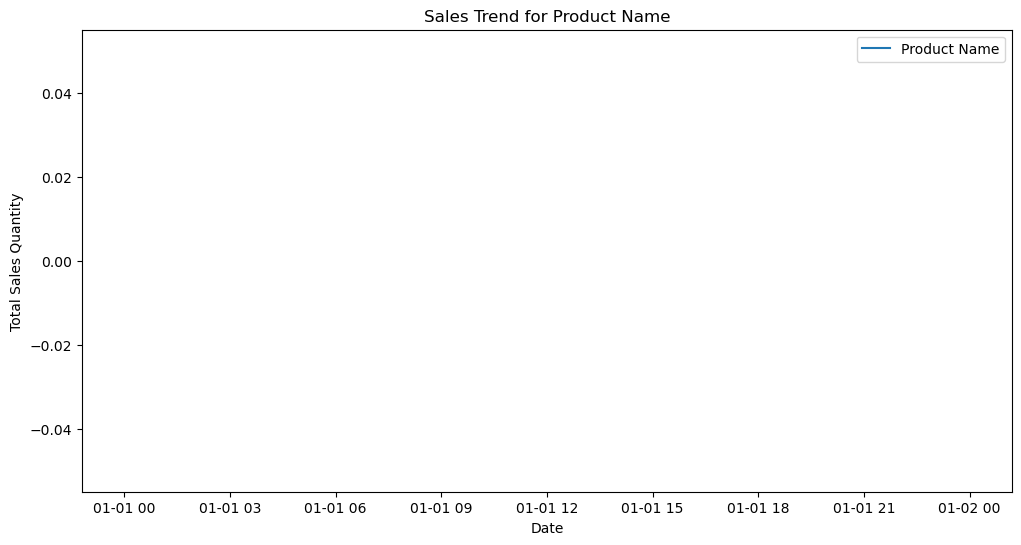

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'InvoiceDate' is the column containing dates
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Extracting relevant columns
product_sales = df.groupby(['InvoiceDate', 'Description'])['Quantity'].sum().reset_index()

# Print unique product names to choose from
unique_products = product_sales['Description'].unique()
print("Unique Product Names:")
print(unique_products)

# Replace 'Product Name' with the actual product name from the list
selected_product = 'Product Name'  # Replace with the actual product name
selected_product_sales = product_sales[product_sales['Description'] == selected_product]

# Plotting the line chart for individual product sales over time
plt.figure(figsize=(12, 6))
plt.plot(selected_product_sales['InvoiceDate'], selected_product_sales['Quantity'], label=selected_product)
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.title(f'Sales Trend for {selected_product}')
plt.legend()
plt.show()


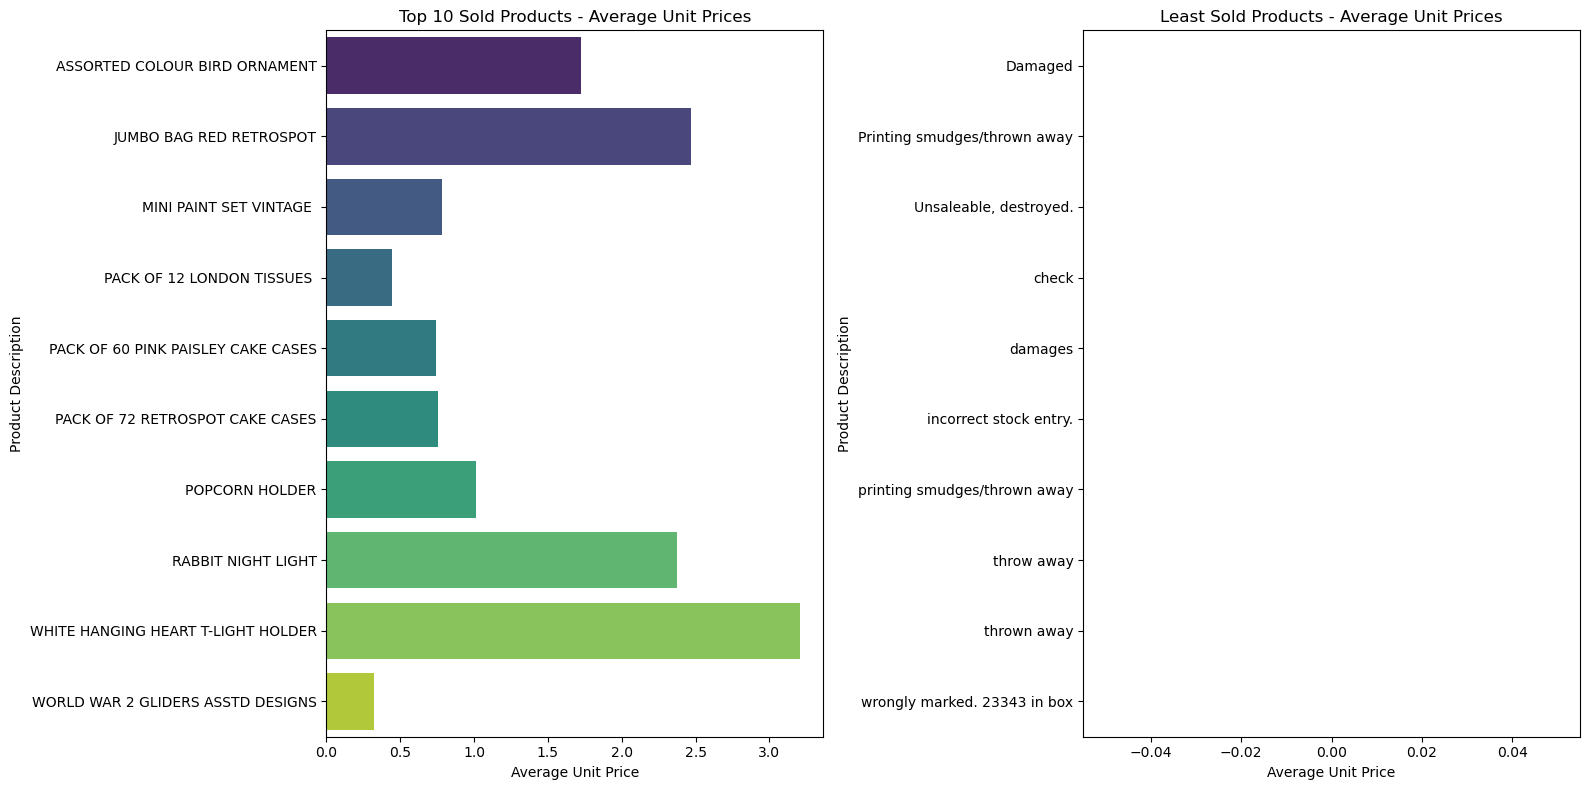

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'Description' is the column containing product names
# and 'UnitPrice' is the column containing the prices

# Top 10 sold products
top_10_sold = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).index
top_10_sold_prices = df[df['Description'].isin(top_10_sold)].groupby('Description')['UnitPrice'].mean()

# Least sold products
least_sold = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True).head(10).index
least_sold_prices = df[df['Description'].isin(least_sold)].groupby('Description')['UnitPrice'].mean()

# Plotting bar charts
plt.figure(figsize=(16, 8))

# Top 10 sold products
plt.subplot(1, 2, 1)
sns.barplot(x=top_10_sold_prices.values, y=top_10_sold_prices.index, palette='viridis')
plt.title('Top 10 Sold Products - Average Unit Prices')
plt.xlabel('Average Unit Price')
plt.ylabel('Product Description')

# Least sold products
plt.subplot(1, 2, 2)
sns.barplot(x=least_sold_prices.values, y=least_sold_prices.index, palette='magma')
plt.title('Least Sold Products - Average Unit Prices')
plt.xlabel('Average Unit Price')
plt.ylabel('Product Description')

plt.tight_layout()
plt.show()
